# Text vectorisation: Turning Text into Features

More advanced forms of text analysis require that text documents are converted into numerical values or features. In this  section we will examine:

* different methods for representing a collection of texts as numbers
* the decisions we need to make when generating a particular representation as well as the kinds of insights each numerical representation can give us.

We will use tools from the Python libraries `scikit-learn` and `gensim` to perform some popular text vectorisation methods:
* Re-cap of N-grams (unigram and bi-gram) term friquency
* TF-IDF (Term Frequency–Inverse Document Frequency)
* Word embedding—Word2Vec

In [1]:
# Import libraries

! pip install gensim
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec

from matplotlib import pyplot as plt

## Turning text into n-grams features 
### Unigrams

Compute the friquency of word occurance using count vectoriser in `scikit-learn`  

### Toy example

In [5]:
# Text corpus

# Load the parsed news dataset 
corpus = pd.read_csv('sample_news_large_phrased.csv', index_col='index')

In [6]:
corpus.head(1)

query                                title  \
index                                                   
0      Hong Kong  Horrifying view of fires from space   

                                                                                                                                                                                                          text  \
index                                                                                                                                                                                                            
0      Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...   

                           published         site  \
index                                               
0      2019-11-08T23:51:00.000+02:00  news.com.au   

                                                                                                                                                                                                        tokens  
index                                                                                                                                                                                                           
0      video|*|image|*|satellite|*|image|*|insane|*|view|*|nsw|*|fire|*|space|*|satellite|*|image|*|huge|*|smoke|*|billow|*|number|*|bushfire|*|nsw|*|nsw|*|fire|*|space|*|source|*|twitter|*|startling|*|s...

In [7]:
# Subset news stories about brexit
corpus_brexit = corpus[corpus['query']=='brexit']

corpus_toy=corpus_brexit.iloc[[7,22], [1]]

# Set the maximum width of columns
pd.options.display.max_colwidth = 200

corpus_toy.head(5)

title
index                                                                                                                    
132    Brexit news: Gina Miller unveils new Remainer plot to block Brexit in general election | UK | News | Express.co.uk
147           Brexit news: Labour pledge to continue ‘freedom of movement’ infuriates Leavers | UK | News | Express.co.uk

In [106]:
# Use CountVectorizer to tokenize a collection of text documents and convert it into a matrix of token counts

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Learn the vocabulary from the corpus using the toy corpus
vectorizer.fit(corpus_toy['title'])

# Transform documents to document-term matrix
vector = vectorizer.transform(corpus_toy['title'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using the vocabulary_ attribute
print(vectorizer.vocabulary_)

{'brexit': 1, 'news': 16, 'gina': 8, 'miller': 13, 'unveils': 23, 'new': 15, 'remainer': 20, 'plot': 19, 'to': 21, 'block': 0, 'in': 9, 'general': 7, 'election': 4, 'uk': 22, 'express': 5, 'co': 2, 'labour': 11, 'pledge': 18, 'continue': 3, 'freedom': 6, 'of': 17, 'movement': 14, 'infuriates': 10, 'leavers': 12}


Note that punctuation and single letter's words are removed. We will use below the prerpocessed tokens you have already preprocessed.

In [107]:
# Access the feature index of a token
vectorizer.vocabulary_.get('brexit')

1

The numbers assigned to each token (e.g., "brexit") are indices. For clarity, indices are sorted in the cell bellow.

In [108]:
# Print the document-term matrix of rows (documents) and columns (count for the number of times a token appeared in the document) 
print(vector.toarray())

[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


`vector.toarray()` returns a matrix where the rows indicate the number of documents (two in our case) and the columns indicate the size of the vocabulary of the entire corpus (all documents).

Each document is encoded as a vector with a length indicating the size of the vocabulary of the entire corpus and an integer count for the number of times each token appeared in the document.

In [109]:
# Sort the dictionary of terms (keys) and indices (values) in the feature matrix by values in ascending order
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))

# Print the document-term matrix
print(vector.toarray())

{'block': 0, 'brexit': 1, 'co': 2, 'continue': 3, 'election': 4, 'express': 5, 'freedom': 6, 'general': 7, 'gina': 8, 'in': 9, 'infuriates': 10, 'labour': 11, 'leavers': 12, 'miller': 13, 'movement': 14, 'new': 15, 'news': 16, 'of': 17, 'pledge': 18, 'plot': 19, 'remainer': 20, 'to': 21, 'uk': 22, 'unveils': 23}
[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


The output consists of 24 unigram features. The 1st token `brexit` has appeared twice in the first title and once in the second title.

In [110]:
# Find (1) the most friquent token in a document, (2) the number of times it appears in that document 
# and (3) the document in which it appears
maximum = vector.toarray().max()
index_of_maximum = np.where(vector.toarray() == maximum)

print("max:", maximum)
print("index:", index_of_maximum)

max: 2
index: (array([0, 0, 0, 1, 1]), array([ 1, 16, 22, 16, 22]))


In [111]:
# Sort the vector of integer count in ascending order
np.sort(vector.toarray())

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2]])

### Example using the entire data set of News Tokens

In [112]:
corpus['text'].head()

index
0    Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...
1    \n Chief Executive addresses the press after citywide chaos and transport disruptions \n Earlier, police shoot protester leaving him in intensive care, while separately, a man is set on fire durin...
2    Hong Kong (CNN) China has announced a curfew on online gaming for minors among new measures aimed at curbing video game addiction.\nThe official government guidelines will be applied to all online...
3    Washington (CNN) President Donald Trump was relentlessly dishonest last week about the scandal over his dealings with Ukraine, making false claims about just about every component of the story.\nT...
4    (CNN) — What is bread? You likely don't have to think for long, and whether you're hungry for a slice of sourdough or craving some tortillas, what you imagine says a lot

In [113]:
# Convert a collection of text documents to a matrix of token counts

vectorizer_corpus = CountVectorizer()

#  Learn the vocabulary from the corpus and tokenise
vectorizer_corpus.fit(corpus['text'])

# Transform documents to document-term matrix
vector_corpus = vectorizer_corpus.transform(corpus['text'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using the vocabulary_ attribute
print(dict(sorted(vectorizer_corpus.vocabulary_.items(), key=lambda item: item[1])))

{'00': 0, '000': 1, '0002': 2, '000th': 3, '0010': 4, '0044': 5, '01': 6, '013': 7, '02': 8, '020': 9, '03': 10, '04': 11, '04c76inq0a': 12, '05': 13, '056': 14, '05am': 15, '06': 16, '07': 17, '08': 18, '0800': 19, '09': 20, '0944': 21, '0iiwtfu5gq': 22, '0s': 23, '10': 24, '100': 25, '1000': 26, '100m': 27, '101': 28, '102': 29, '103': 30, '104': 31, '105': 32, '106': 33, '106619': 34, '107': 35, '108': 36, '109': 37, '109554': 38, '10am': 39, '10k': 40, '10pm': 41, '10th': 42, '11': 43, '110': 44, '110541': 45, '111': 46, '112': 47, '113': 48, '114': 49, '115': 50, '116': 51, '117': 52, '117513': 53, '118': 54, '1187098428737753091': 55, '119': 56, '11th': 57, '12': 58, '120': 59, '1200': 60, '121': 61, '121647': 62, '122': 63, '123': 64, '124': 65, '125': 66, '126': 67, '127': 68, '128': 69, '129': 70, '12bn': 71, '12m': 72, '12th': 73, '13': 74, '130': 75, '131': 76, '132': 77, '132m': 78, '133': 79, '134': 80, '135': 81, '136': 82, '137': 83, '138': 84, '139': 85, '13am': 86, '14

In [114]:
# Print the document-term matrix
print(vector_corpus.toarray())

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Dimensions of vector_corpus.toarray(), i.e., number of rows and columns
vector_corpus.toarray().shape

## Exercise 1

Using the entire corpus, find (1) the most friquent token in a document, (2) the number of times it appears in that document and (3) the document in which it appears.

In [ ]:
# Please write below the code for Exercise 1

maximum = vector_corpus.toarray().max()
index_of_maximum = np.where(vector_corpus.toarray() == maximum)

print("max:", maximum)
print("token index:", index_of_maximum)

The the most frequent token is in document 3 and indexed 12823. 

In [ ]:
# Find the token indexed 12823 by getting a key in a dictionary by its value 
# The value in the "vectorizer_corpus.vocabulary_" is the token index

dict((v,k) for k,v in vectorizer_corpus.vocabulary_.items())[12823]

In [ ]:
# To double check, get value by key

vectorizer_corpus.vocabulary_.get('the')

### Bi-grams (combination of two tokens)
In the unigram transformation, each token is a feature. For example, `general` and `election` are two separate features. The bi-gram transformation relaxes this contrain by pairing each word to previous and subsequent words.  

In [ ]:
# Extracting unigrams and bigrams
    # ngram_range of (1, 1) extracts unigrams
    # ngram_range of (1, 2) extracts unigrams and bigrams
    # ngram_range of (1, 2) extracts bigrams

# Create an instance of the CountVectorizer class set bigram extraction   
vectorizer = CountVectorizer(ngram_range=(2,2))

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_toy['title'])

# Transform documents to document-term matrix
vector = vectorizer.transform(corpus_toy['title'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using vocabulary_
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))

# Print the document-term matrix
print(vector.toarray())

The output consists of 28 bigram-based features. The count is either 1 or 0 for each of our bigram.     

##  Term frequency–inverse document frequency (TF-IDF)

TF-IDF vectorisation weights down tokens that are present across many documents in the corpus (in particular, words like "of" and "the" if stop words are not removed) and are therefore less informative than tokens that are present in specific documents in the corpus. 

### Toy example

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(norm=None)

# Learn the vocabulary from the corpus and tokenise
matrix = vectorizer.fit_transform(corpus_toy['title'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using vocabulary_
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))

# Print the IDF scores 
print(vectorizer.idf_)

#### The above computes the `IDF` part. Let's get the `TF` (term frequency) as before 

In [ ]:
# We use the CountVectorizer function we used above to count n-grams
vectorizer = CountVectorizer()
vectorizer.fit(corpus_toy['title'])
vector = vectorizer.transform(corpus_toy['title'])
print(vector.toarray())

#### Below we get the TF-IDF for our toy corpus

In [ ]:
# Convert the TF-IDF matrix into a DataFrame   
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

### How is TF-IDF computed by `scikit-learn`?  


TF-IDF(t,d) = TF * IDF

What is the TF-IDF of the term 'brexit' which is term 1 in document 0 so TF-IDF(1,0)

TF = 2

IDF = log(N + 1 / n + 1) + 1 where N is the total number of documents and n is the number of documents in which the term appears; constant “1” is added to the numerator and denominator to prevent zero divisions (see [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)). 


In [ ]:
import math as m
# the term "brexit" is present in two of two documents
IDF = m.log((2+1)/(2+1))+1 
IDF

So TF-IDF for term 1 (brexit) in document 0 is **TF-IDF (1,0) = TF * TDF = 2 * 1 = 2**

#### Let's try another example, the fourth term ('election') in document 0

TF-IDF(4.0) = TF * IDF

TF = 1

In [ ]:
# the term "election" is present in one of two documents
IDF = m.log((2+1)/(1+1))+1
IDF

So TF-IDF for term 4 ('election') in document 0 is **TF-IDF (4,0) = TF * TDF = 1 * 1.405 = 1.405**

#### The above TF-IDF matrix is not normalised. Typically, it is recommended that the TF-IDF weights are normalised meaning that the weights in the matrix will range between 0 and 1. Below is the normalisation code (L2 normalisation is default in the TfidfVectorizer function but we indicate it below for clarity)

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(norm ='l2')

# Learn the vocabulary from the corpus and create a document-term matrix
matrix = vectorizer.fit_transform(corpus_toy['title'])

# Convert the TF-IDF matrix into a DataFrame
pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

### TF-IDF vectorisation of the `row` news sub-corpus related to Brexit

In [ ]:
# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn the vocabulary from the corpus and create a document-term matrix
matrix = vectorizer.fit_transform(corpus_brexit['text'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using vocabulary_
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))

In [ ]:
# Print the IDF scores
print(vectorizer.idf_)

In [ ]:
# IDF of a few tokens in the brexit corpus
print("IDF score of the term 'the':",vectorizer.idf_[vectorizer.vocabulary_["the"]])
print("IDF score of the term 'brexit':",vectorizer.idf_[vectorizer.vocabulary_["brexit"]])
print("IDF score of the term 'deal':",vectorizer.idf_[vectorizer.vocabulary_["deal"]])
print("IDF score of the term 'protesters':", vectorizer.idf_[vectorizer.vocabulary_["protesters"]])

The word `"the"` is present in many documents and hence the vector value is close to 1; Converseley, the term `"protesters"` is present in few documents and has a higher IDF value. 

In [ ]:
# TF-IDF matrix
# The vectorizer.get_feature_names() gives you the list of feature names
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

In [ ]:
# TF-IDF of the token "the" in the brexit corpus
tf_idf_df.loc[:,['the','brexit','deal','protesters']]

The token `"the"` is downweighted but still has high TF-IDF weights due to the high term frequency (Note that the TF-IDF score is a product of term frequency & inverse document frequency). The term `"protesters"` is present in a few documents and because it's term frequency is 0 in many documents, the TF-IDF score is 0 too. 

### Let's explore some parameters of the TfidfVectorizer function

In [ ]:
# Play with the following TfidfVectorizer parameters (use Shift + Tab to explore the parameters):
    # stop_words='english' ; stop_words: removes stopwords, only for english, some with issues; automatically filters stop words based on intra corpus document frequency of terms 
    # min_df = e.g., 0.2; float or int, default=1.0. ignores terms that have a document frequency lower than the given threshold
    # max_df = e.g., 0.9; float or int, default=1.0. ignores terms that have a document frequency higher than the given threshold
    # max_features= e.g., 5

# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.2, 
                             max_df = 0.9) # threshold depends on corpus and question
                             # max_features=5
    
# Learn the vocabulary from the corpus and create a document-term matrix
matrix = vectorizer.fit_transform(corpus_brexit['text'])

# Summarize & print the tokens and the matrix of TF-IDF features
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

#### TF-IDF vectorisation using the `tokenised` News sub-corpus related to Brexit

In [ ]:
# Compute TF-IDF on your tokenised news corpus related to Brexit
            
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.2, 
                             max_df = 0.9) # threshold depends on corpus and question
                             # max_features = 5 # you can specify a subset of features to consider

# Learn the vocabulary from the corpus and create a document-term matrix
matrix = vectorizer.fit_transform(corpus_brexit['tokens'])

# Create a DataFrame 
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

Below the word `"the"` appears in more than 90% of the documents and is removed on that basis. Also, the word `"protesters"` appears in less than 20% of the documents and is removed on that basis.   

In [ ]:
# Show the TF-IDF vectors for a few tokens 
tf_idf_df.loc[:,['the','brexit','deal','protesters']]

In [ ]:
# Show only tokens that are in the tf_idf_df DataFrame
tf_idf_df.loc[:,['brexit','deal']]

#### Plot two features using a scatter plot

In [ ]:
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.2, s=200)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

#### Cluster the 25 docuemtns about Brexit using K-means clustering

In [ ]:
# For details about k-mean, see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(matrix)

In [ ]:
# Assign a document to a category 
tf_idf_df['category'] = km.labels_
tf_idf_df

#### Plot the 3 clusters using a scatter plot

In [ ]:
# Specify a color for each category
colormap = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# Create a color map
colors = tf_idf_df.apply(lambda row: colormap[row.category], axis=1)

# # Plot your scatter plot
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.1, s=300, c=colors)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

### Cluster the terms `brexit` and `deal` using TF-IDF for the entire corpus  

In [ ]:
# Compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df = 0.1, 
                             max_df = 0.9, # threshold depends on corpus and question
                             max_features=100) 
matrix = vectorizer.fit_transform(corpus['tokens'])

# DataFrame
tf_idf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tf_idf_df

In [ ]:
# Cluster with 3 categories
# Use only the terms 'brexit' and 'deal'
km = KMeans(n_clusters=3)
km.fit(tf_idf_df[['brexit', 'deal']])

# Assign the category to the dataframe
tf_idf_df['category'] = km.labels_

# Create a color map
colormap = { 0: 'red', 1: 'green', 2: 'blue' }
colors = tf_idf_df.apply(lambda row: colormap[row.category], axis=1)

# Plot your scatter plot
ax = tf_idf_df.plot(kind='scatter', x='brexit', y='deal', alpha=0.1, s=300, c=colors)
ax.set_xlabel("brexit")
ax.set_ylabel("deal")

## Word Embeddings and word2vec

> You shall know a word by the company it keeps (Firth, 1957).

`Word2vec` [Mikolov et al., 2013](https://arxiv.org/abs/1301.3781) and related techniques (e.g., [GloVe](https://nlp.stanford.edu/projects/glove/)) use the context of a given word — i.e., the words surrounding a word — to learn its meaning and represent it as vectors.

Two word2vec models: Skip-Gram and Continuous Bag of Words (CBOW)

The skip-gram model predicts the probabilities of a word given the context of word or words. For example, in the sentence "UK agrees Brexit trade deal", we have a target word and context words surrounding the target word. The number of words to be considered around the target word is called the window size. Using a window size of 2, here are the first three target and context variables for the sentence "UK agrees Brexit trade deal with EU": 

| Target word | Context word(s) |
|---|--------|
| UK | agree Brexit |
| agree | UK Brexit trade |
| Brexit | UK agree trade deal  |

See Akshay Kulkarni and Adarsha Shivananda. 2019. Natural Language Processing Recipes. [Chapter 3: Converting Text to Features](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#)

In [8]:
# Convert your tokens in the News dataset into a list
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))

<ipython-input-8-148acfbc1404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


In [9]:
corpus['tokens']= corpus['tokens'].apply(lambda token_string: token_string.split('|*|'))

In [10]:
corpus['tokens'].head()

index
0    [video, image, satellite, image, insane, view, nsw, fire, space, satellite, image, huge, smoke, billow, number, bushfire, nsw, nsw, fire, space, source, twitter, startling, satellite, image, fire,...
1    [chief_executive, address, press, citywide, chaos, transport, disruption, early, police, shoot, protester, leave, -pron-, intensive, care, separately, man, set, fire, dispute, chaos, continue, sho...
2    [hong_kong, cnn, china, announce, curfew, online, gaming, minor, new, measure, aim, curb, video, game, addiction, official, government, guideline, apply, online, gaming, platform, operate, country...
3    [washington, cnn, president_donald, trump, relentlessly, dishonest, week, scandal, -pron-, dealing, ukraine, false_claim, component, story, trump, false_claim, week, second, high, total, week, -pr...
4    [cnn, bread, -pron-, likely, think, long, -pron-, hungry, slice, sourdough, crave, tortilla, -pron-, imagine, lot, -pron-, bread, easy, picture, -pron-, hard, define, br

In [11]:
# Training the word2vec skip-gram model
skipgram = Word2Vec(corpus['tokens'], size =300, window = 3, min_count=1,sg = 1)


In [12]:
skipgram['brexit']

<ipython-input-12-af6ecfbb24a8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  skipgram['brexit']


array([ 0.0236021 , -0.04575207,  0.00954328,  0.23647933,  0.06711882,
       -0.00335927, -0.09042791,  0.00966841,  0.06851538,  0.07053004,
       -0.12752216,  0.1004373 , -0.00651433, -0.11399247, -0.06186979,
        0.06276417, -0.16815422, -0.03047061, -0.18811987,  0.1384864 ,
        0.09852744, -0.05334696, -0.09745919, -0.14619888, -0.03216003,
       -0.16044371, -0.03691677, -0.04164163, -0.19972964,  0.1258502 ,
        0.11056164, -0.03845768, -0.00300784, -0.02934335, -0.15533087,
        0.03695092, -0.06524037,  0.154841  ,  0.01488406,  0.11852164,
       -0.01271065,  0.04776939,  0.01223303, -0.14066398, -0.00593998,
       -0.05137033,  0.00198713,  0.1139969 , -0.04673177,  0.03990802,
        0.05695702, -0.01409907, -0.04606154,  0.12987424,  0.03620411,
       -0.12807222,  0.02208442, -0.09981509, -0.26858702,  0.04896488,
       -0.10874094, -0.04445298,  0.14602315, -0.01153991, -0.07797978,
        0.01080974, -0.01777417,  0.0595308 , -0.14195353,  0.02

In [14]:
print("Dimensionality—size of vocabulary and size of vectors:", skipgram)

# access vector for one word, "brexit" in this instance
print("vector for 'brexit':", skipgram['brexit'])

Dimensionality—size of vocabulary and size of vectors: Word2Vec(vocab=10834, size=300, alpha=0.025)
vector for 'brexit': [ 0.0236021  -0.04575207  0.00954328  0.23647933  0.06711882 -0.00335927
 -0.09042791  0.00966841  0.06851538  0.07053004 -0.12752216  0.1004373
 -0.00651433 -0.11399247 -0.06186979  0.06276417 -0.16815422 -0.03047061
 -0.18811987  0.1384864   0.09852744 -0.05334696 -0.09745919 -0.14619888
 -0.03216003 -0.16044371 -0.03691677 -0.04164163 -0.19972964  0.1258502
  0.11056164 -0.03845768 -0.00300784 -0.02934335 -0.15533087  0.03695092
 -0.06524037  0.154841    0.01488406  0.11852164 -0.01271065  0.04776939
  0.01223303 -0.14066398 -0.00593998 -0.05137033  0.00198713  0.1139969
 -0.04673177  0.03990802  0.05695702 -0.01409907 -0.04606154  0.12987424
  0.03620411 -0.12807222  0.02208442 -0.09981509 -0.26858702  0.04896488
 -0.10874094 -0.04445298  0.14602315 -0.01153991 -0.07797978  0.01080974
 -0.01777417  0.0595308  -0.14195353  0.02876576  0.15963784  0.04929573
  0.03

<ipython-input-14-2527db47bd23>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print("vector for 'brexit':", skipgram['brexit'])


In [15]:
# Similarity between two tokens, e.g., brexit and deal
skipgram.wv.similarity('brexit', 'deal')

0.99511415

In [16]:
# The most similar token to a given token, e.g., brexit
skipgram.wv.most_similar(positive = "brexit")

[('leave', 0.999715268611908),
 ('buy', 0.9996816515922546),
 ('allow', 0.9996671676635742),
 ('pass', 0.9996670484542847),
 ('sure', 0.9996644258499146),
 ('away', 0.9996539354324341),
 ('sign', 0.9996474981307983),
 ('kind', 0.9996405839920044),
 ('server', 0.9996355772018433),
 ('question', 0.9996209144592285)]

In [ ]:
# Fit Principal component analysis (PCA) on the skipgram model output and plot the first 2 components

data = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(data)
# create a scatter plot of the projection
plt.figure(figsize=(28,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
       plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


#### Use a pre-trained model using Google News data

In [18]:
# Load the Word2vec model trained on the Google News dataset 
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [19]:
# Obtain vectors for terms in the model
immigration = wv['immigration']
immigration

array([-1.16210938e-01,  1.35742188e-01,  1.36718750e-01,  1.42578125e-01,
       -2.55859375e-01, -2.87109375e-01,  1.05468750e-01,  2.40234375e-01,
       -2.51953125e-01, -6.29882812e-02,  2.91015625e-01, -3.34472656e-02,
       -2.78320312e-02,  1.82617188e-01,  4.41894531e-02, -1.02539062e-01,
        1.40625000e-01,  6.25000000e-01, -1.04492188e-01, -2.40234375e-01,
        7.51953125e-02, -3.90625000e-02,  3.35937500e-01, -1.33789062e-01,
       -6.05468750e-02, -5.07812500e-02,  1.24511719e-01, -2.29492188e-01,
        1.78710938e-01,  7.23266602e-03,  1.53320312e-01, -4.29687500e-02,
       -5.90820312e-02, -1.51367188e-01,  1.36718750e-02, -6.68945312e-02,
       -1.87988281e-02,  1.26953125e-01,  8.69140625e-02, -5.07812500e-02,
       -2.05078125e-01, -1.35742188e-01,  2.59765625e-01,  1.42578125e-01,
       -2.71484375e-01,  9.71679688e-02, -1.24511719e-01,  2.55859375e-01,
        8.00781250e-02,  3.90625000e-02,  8.44726562e-02, -1.29882812e-01,
       -1.42578125e-01,  

In [21]:
print(wv.most_similar(positive=['immigration'], topn=20))

[('Immigration', 0.7575444579124451), ('illegal_immigration', 0.7396935224533081), ('immigrations', 0.7351098656654358), ('illegal_immigrants', 0.661632776260376), ('immigation', 0.6604097485542297), ('immigrants', 0.6578113436698914), ('illegal_immigrant', 0.6361725330352783), ('immigration_reform', 0.6335227489471436), ('illegal_alien', 0.6089527010917664), ('deportations', 0.6071246862411499), ('deportation', 0.6051470041275024), ('immigrant', 0.6017557382583618), ('undocumented_immigrants', 0.5970046520233154), ('IMMIGRATION', 0.5869342088699341), ('undocumented_workers', 0.5762966275215149), ('immi_gration', 0.5624114274978638), ('deporting', 0.5618883967399597), ('illegal_aliens', 0.55970698595047), ('attorney_Ilana_Greenstein', 0.5589761734008789), ('deport', 0.5580031275749207)]


In [20]:
# print the 5 most similar words to “nurse” or “librarian”
print(wv.most_similar(positive=['nurse', 'librarian'], topn=20))

[('registered_nurse', 0.7211818695068359), ('reference_librarian', 0.634443461894989), ('nurse_practitioner', 0.6301048994064331), ('teacher', 0.6299265623092651), ('guidance_counselor', 0.6149507761001587), ('respiratory_therapist', 0.6086797118186951), ('midwife', 0.5967817902565002), ('schoolteacher', 0.5860755443572998), ('dental_hygienist', 0.5835506916046143), ('neonatal_nurse', 0.5728733539581299), ('medical_transcriptionist', 0.5722984075546265), ('x_ray_technician', 0.5703535079956055), ('radiology_technician', 0.567882776260376), ('nurses', 0.5677641034126282), ('para_educator', 0.5656979084014893), ('nurse_midwife', 0.559863269329071), ('Librarian', 0.5595521330833435), ('candy_striper', 0.5586028099060059), ('receptionist', 0.5556811690330505), ('Licensed_Practical_Nurse', 0.5554629564285278)]


In [23]:
# Compare similarities of pairs of concepts
pairs = [
    ('sociology', 'society'), 
    ('sociology', 'individual'),
    ('sociology', 'market'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'sociology'	'society'	0.26
'sociology'	'individual'	0.01
'sociology'	'market'	-0.01


In [26]:
# Vector relations e.g. vector_King - vector_Man = vector_Queen - vector_Woman
wv.most_similar(positive=['king', 'women'], negative=['man'])

[('queen', 0.4827325940132141),
 ('queens', 0.4667813777923584),
 ('kumaris', 0.4653733968734741),
 ('kings', 0.4558638334274292),
 ('womens', 0.422832190990448),
 ('princes', 0.4176960587501526),
 ('Al_Anqari', 0.4172550439834595),
 ('concubines', 0.4011078476905823),
 ('monarch', 0.39624831080436707),
 ('monarchy', 0.39430153369903564)]

In [27]:
# Another analogy example
wv.most_similar(positive=['Rome', 'France'], negative=['Paris'])

[('Italy', 0.7143559455871582),
 ('Italians', 0.5599662661552429),
 ('Sicily', 0.5547021627426147),
 ('Flaminio_Stadium', 0.5299074649810791),
 ('Spain', 0.5046595335006714),
 ('Bambino_Gesu_Hospital', 0.4948221445083618),
 ('Italian', 0.49266600608825684),
 ('Portugal', 0.48604875802993774),
 ('Val_Di_Fiemme', 0.48168694972991943),
 ('Antonio_Martino', 0.48000505566596985)]

## Different ways of storing and accessing your corpus for Word2Vec training

In [29]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.summarization.textcleaner import split_sentences
import re
import os

In [30]:
# Save in a variable the path to your directory where you store your text files 
DocByLine = '/Users/valentindanchev/Documents/Teaching/sc207/SC207/DocByLine'

If you have a plain-text file or files where each 'document' is on its own line, you can use the class [`MyPreprocessedSentences`](https://rare-technologies.com/word2vec-tutorial/) to process the input file by file, line by line. The class collects documents and processes them using the function `simple_preprocess` from the module `gensim.utils`, which contains various general utility functions. The function converts a document into a list of tokens that are lowercased and de-accented (optional).

Parameters of `simple_preprocess`: 

* `doc` This is your input document (str).

* `min_len` Minimum lenght of token in output (inclusive). Shorter tokens are discarded. Default is 2. 

* `max_len` Maximum length of token in output (inclusive). Longer tokens are discarded. Default is 15. 

* `deacc` Remove accent marks from tokens using the deaccent() function. Default is `False`.

Let's add `simple_preprocess` to the `MySentences` class:

In [31]:
# Define the class MyPreprocessedSentences
class MyPreprocessedSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            # specify encoding "cp437" as other encodings, e.g., "utf8" may give you an error
            for line in open(os.path.join(self.dirname, fname), encoding="cp437"):
                yield gensim.utils.simple_preprocess(line, deacc=True) # vocabulary preprocessing 

# Apply MyPreprocessedSentences and fit the vanilla Word2Vec model to the preprocessed sentences
sentences = MyPreprocessedSentences(DocByLine) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=1)

You can view the model vocabulary in the field `vocab` of the Word2Vec model's `wv` property. The vocabulary is stored as a dictionary where each key is a token. 

In [32]:
# Show the vocabulary of your Word2Vec model
model.wv.vocab

{'it': <gensim.models.keyedvectors.Vocab at 0x7fb9581f1760>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fb9581f1f70>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7fba97473d90>,
 'universally': <gensim.models.keyedvectors.Vocab at 0x7fba97473e50>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7fba97473eb0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fba97473ee0>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7fba97473f40>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7fba97473fa0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fba97473fd0>,
 'possession': <gensim.models.keyedvectors.Vocab at 0x7fba974735e0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fba97482040>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7fba974820a0>,
 'fortune': <gensim.models.keyedvectors.Vocab at 0x7fba97482100>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7fba97482160>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7fba974821c0>,
 'want': <gensim.models.keyedvectors.Vo

In [33]:
# Show the size of the vocabulary
len(model.wv.vocab)
# Change the min_len parameter of the simple_preprocess function in the MyPreprocessedSentences class 
# and check again the length of the vocabulary

174

Sometimes our docuemtns are not neatly organised such that each line in a file is a 'document'. For example, we may have many books each stored as a single file in a directory.

In [34]:
DocByFile = '/Users/valentindanchev/Documents/Teaching/sc207/SC207/DocByFile'

In [35]:
class FromBooksToSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            #with open(os.path.join(self.dirname, fname), encoding="cp437") as f:
            with open(os.path.join(self.dirname, fname), errors='ignore') as f:
                # Read each file and replace multiple characters at once using nested replace()
                text = f.read().replace('\n', '').replace('”', '').replace('“', '')
                # Use the re module to replace all multiple whitespaces with single whitespace 
                text = re.sub('\s+',' ', text)
                # print(text) # uncomment to see the output
                # Split the text into a list of sentences using the split_sentences function from gensim   
                for sentence in split_sentences(text):
                    print("SENTENCE:",sentence) # uncomment to see the output
                    yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [36]:
sentences = FromBooksToSentences(DocByFile)
model = gensim.models.Word2Vec(sentences, min_count=4)

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: He really believed, that were it not for the inferiority of her connections, he should be in some danger.
SENTENCE: Miss Bingley saw, or suspected enough to be jealous; and her great anxiety for the recovery of her dear friend Jane received some assistance from her desire of getting rid of Elizabeth.
SENTENCE: She often tried to provoke Darcy into disliking her guest, by talking of their supposed marriage, and planning his happiness in such an alliance.
SENTENCE: I hope, said she, as they were walking together in the shrubbery the next day, you will give your mother-in-law a few hints, when this desirable event takes place, as to the advantage of holding her tongue; and if you can compass it, do cure the younger girls of running after officers.
SENTENCE: And, if I may mention so delicate a subject, endeavour to check that little something, bordering on conceit and impertinence, which your lady possesses.
SENTENCE: Have you anything else to propose for my domestic felicity?
SE

SENTENCE: Excuse my interference—it was kindly meant.
SENTENCE: Insolent girl!
SENTENCE: said Elizabeth to herself.
SENTENCE: You are much mistaken if you expect to influence me by such a paltry attack as this.
SENTENCE: I see nothing in it but your own wilful ignorance and the malice of Mr. Darcy.
SENTENCE: She then sought her eldest sister, who had undertaken to make inquiries on the same subject of Bingley.
SENTENCE: Jane met her with a smile of such sweet complacency, a glow of such happy expression, as sufficiently marked how well she was satisfied with the occurrences of the evening.
SENTENCE: Elizabeth instantly read her feelings, and at that moment solicitude for Wickham, resentment against his enemies, and everything else, gave way before the hope of Jane’s being in the fairest way for happiness.
SENTENCE: I want to know, said she, with a countenance no less smiling than her sister’s, what you have learnt about Mr. Wickham.
SENTENCE: But perhaps you have been too pleasantly en

SENTENCE: _She_ will not be able to help calling.
SENTENCE: She will drop the acquaintance entirely.
SENTENCE: But in spite of the certainty in which Elizabeth affected to place this point, as well as the still more interesting one of Bingley’s being withheld from seeing Jane, she felt a solicitude on the subject which convinced her, on examination, that she did not consider it entirely hopeless.
SENTENCE: It was possible, and sometimes she thought it probable, that his affection might be reanimated, and the influence of his friends successfully combated by the more natural influence of Jane’s attractions.
SENTENCE: Miss Bennet accepted her aunt’s invitation with pleasure; and the Bingleys were no otherwise in her thoughts at the same time, than as she hoped by Caroline’s not living in the same house with her brother, she might occasionally spend a morning with her, without any danger of seeing him.
SENTENCE: The Gardiners stayed a week at Longbourn; and what with the Phillipses, the L

SENTENCE: Does your charge give you much trouble?
SENTENCE: Young ladies of her age are sometimes a little difficult to manage, and if she has the true Darcy spirit, she may like to have her own way.
SENTENCE: As she spoke she observed him looking at her earnestly; and the manner in which he immediately asked her why she supposed Miss Darcy likely to give them any uneasiness, convinced her that she had somehow or other got pretty near the truth.
SENTENCE: She directly replied: You need not be frightened.
SENTENCE: I never heard any harm of her; and I dare say she is one of the most tractable creatures in the world.
SENTENCE: She is a very great favourite with some ladies of my acquaintance, Mrs. Hurst and Miss Bingley.
SENTENCE: I think I have heard you say that you know them.
SENTENCE: I know them a little.
SENTENCE: Their brother is a pleasant gentlemanlike man—he is a great friend of Darcy’s.
SENTENCE: Oh!
SENTENCE: yes, said Elizabeth drily; Mr. Darcy is uncommonly kind to Mr. Bing

SENTENCE: The elder Miss Bennets alone were still able to eat, drink, and sleep, and pursue the usual course of their employments.
SENTENCE: Very frequently were they reproached for this insensibility by Kitty and Lydia, whose own misery was extreme, and who could not comprehend such hard-heartedness in any of the family.
SENTENCE: Good Heaven!
SENTENCE: what is to become of us?
SENTENCE: What are we to do?
SENTENCE: would they often exclaim in the bitterness of woe.
SENTENCE: How can you be smiling so, Lizzy?
SENTENCE: Their affectionate mother shared all their grief; she remembered what she had herself endured on a similar occasion, five-and-twenty years ago.
SENTENCE: I am sure, said she, I cried for two days together when Colonel Miller’s regiment went away.
SENTENCE: I thought I should have broken my heart.
SENTENCE: I am sure I shall break _mine_, said Lydia.
SENTENCE: If one could but go to Brighton!
SENTENCE: observed Mrs. Bennet.
SENTENCE: Oh, yes!—if one could but go to Brigh

SENTENCE: Say that urgent business calls us home immediately.
SENTENCE: Conceal the unhappy truth as long as it is possible, I know it cannot be long.
SENTENCE: He readily assured her of his secrecy; again expressed his sorrow for her distress, wished it a happier conclusion than there was at present reason to hope, and leaving his compliments for her relations, with only one serious, parting look, went away.
SENTENCE: As he quitted the room, Elizabeth felt how improbable it was that they should ever see each other again on such terms of cordiality as had marked their several meetings in Derbyshire; and as she threw a retrospective glance over the whole of their acquaintance, so full of contradictions and varieties, sighed at the perverseness of those feelings which would now have promoted its continuance, and would formerly have rejoiced in its termination.
SENTENCE: If gratitude and esteem are good foundations of affection, Elizabeth’s change of sentiment will be neither improbable n

SENTENCE: There was no want of discourse.
SENTENCE: The bride and her mother could neither of them talk fast enough; and Wickham, who happened to sit near Elizabeth, began inquiring after his acquaintance in that neighbourhood, with a good humoured ease which she felt very unable to equal in her replies.
SENTENCE: They seemed each of them to have the happiest memories in the world.
SENTENCE: Nothing of the past was recollected with pain; and Lydia led voluntarily to subjects which her sisters would not have alluded to for the world.
SENTENCE: Only think of its being three months, she cried, since I went away; it seems but a fortnight I declare; and yet there have been things enough happened in the time.
SENTENCE: Good gracious!
SENTENCE: when I went away, I am sure I had no more idea of being married till I came back again!
SENTENCE: though I thought it would be very good fun if I was.
SENTENCE: Her father lifted up his eyes.
SENTENCE: Jane was distressed.
SENTENCE: Elizabeth looked ex

SENTENCE: I do not pretend to possess equal frankness with your ladyship.
SENTENCE: _You_ may ask questions which _I_ shall not choose to answer.
SENTENCE: This is not to be borne.
SENTENCE: Miss Bennet, I insist on being satisfied.
SENTENCE: Has he, has my nephew, made you an offer of marriage?
SENTENCE: Your ladyship has declared it to be impossible.
SENTENCE: It ought to be so; it must be so, while he retains the use of his reason.
SENTENCE: But _your_ arts and allurements may, in a moment of infatuation, have made him forget what he owes to himself and to all his family.
SENTENCE: You may have drawn him in.
SENTENCE: If I have, I shall be the last person to confess it.
SENTENCE: Miss Bennet, do you know who I am?
SENTENCE: I have not been accustomed to such language as this.
SENTENCE: I am almost the nearest relation he has in the world, and am entitled to know all his dearest concerns.
SENTENCE: But you are not entitled to know _mine;_ nor will such behaviour as this, ever induce 

SENTENCE: Had you not been really amiable, you would have hated me for it; but in spite of the pains you took to disguise yourself, your feelings were always noble and just; and in your heart, you thoroughly despised the persons who so assiduously courted you.
SENTENCE: There—I have saved you the trouble of accounting for it; and really, all things considered, I begin to think it perfectly reasonable.
SENTENCE: To be sure, you knew no actual good of me—but nobody thinks of _that_ when they fall in love.
SENTENCE: Was there no good in your affectionate behaviour to Jane while she was ill at Netherfield?
SENTENCE: Dearest Jane!
SENTENCE: who could have done less for her?
SENTENCE: But make a virtue of it by all means.
SENTENCE: My good qualities are under your protection, and you are to exaggerate them as much as possible; and, in return, it belongs to me to find occasions for teasing and quarrelling with you as often as may be; and I shall begin directly by asking you what made you so u

SENTENCE: It is solong before the mind can persuade itself that she whom we saw every dayand whose very existence appeared a part of our own can have departedfor ever—that the brightness of a beloved eye can have beenextinguished and the sound of a voice so familiar and dear to the earcan be hushed, never more to be heard.
SENTENCE: These are the reflections ofthe first days; but when the lapse of time proves the reality of theevil, then the actual bitterness of grief commences.
SENTENCE: Yet from whom hasnot that rude hand rent away some dear connection?
SENTENCE: And why should Idescribe a sorrow which all have felt, and must feel?
SENTENCE: The time atlength arrives when grief is rather an indulgence than a necessity; andthe smile that plays upon the lips, although it may be deemed asacrilege, is not banished.
SENTENCE: My mother was dead, but we had stillduties which we ought to perform; we must continue our course with therest and learn to think ourselves fortunate whilst one rema

SENTENCE: Do not fear.
SENTENCE: Iwill proclaim, I will prove your innocence.
SENTENCE: I will melt the stonyhearts of your enemies by my tears and prayers.
SENTENCE: You shall not die!You, my playfellow, my companion, my sister, perish on the scaffold!No!
SENTENCE: No!
SENTENCE: I never could survive so horrible a misfortune.Justine shook her head mournfully.
SENTENCE: I do not fear to die, she said;that pang is past.
SENTENCE: God raises my weakness and gives me courage toendure the worst.
SENTENCE: I leave a sad and bitter world; and if you rememberme and think of me as of one unjustly condemned, I am resigned to thefate awaiting me.
SENTENCE: Learn from me, dear lady, to submit in patience tothe will of heaven!During this conversation I had retired to a corner of the prison room,where I could conceal the horrid anguish that possessed me.
SENTENCE: Despair!Who dared talk of that?
SENTENCE: The poor victim, who on the morrow was to passthe awful boundary between life and death, felt 

SENTENCE: A woman wassleeping on some straw; she was young, not indeed so beautiful as herwhose portrait I held, but of an agreeable aspect and blooming in theloveliness of youth and health.
SENTENCE: Here, I thought, is one of those whosejoy-imparting smiles are bestowed on all but me.
SENTENCE: And then I bent overher and whispered, ‘Awake, fairest, thy lover is near—he who wouldgive his life but to obtain one look of affection from thine eyes; mybeloved, awake!’The sleeper stirred; a thrill of terror ran through me.
SENTENCE: Should sheindeed awake, and see me, and curse me, and denounce the murderer?
SENTENCE: Thuswould she assuredly act if her darkened eyes opened and she beheld me.The thought was madness; it stirred the fiend within me—not I, butshe, shall suffer; the murder I have committed because I am for everrobbed of all that she could give me, she shall atone.
SENTENCE: The crime hadits source in her; be hers the punishment!
SENTENCE: Thanks to the lessons ofFelix and the s

SENTENCE: Mine has been a tale of horrors; I have reached their_acme_, and what I must now relate can but be tedious to you.
SENTENCE: Knowthat, one by one, my friends were snatched away; I was left desolate.
SENTENCE: Myown strength is exhausted, and I must tell, in a few words, what remains ofmy hideous narration.I arrived at Geneva.
SENTENCE: My father and Ernest yet lived, but the former sunkunder the tidings that I bore.
SENTENCE: I see him now, excellent and venerable oldman!
SENTENCE: His eyes wandered in vacancy, for they had lost their charm and theirdelight—his Elizabeth, his more than daughter, whom he doted on withall that affection which a man feels, who in the decline of life, havingfew affections, clings more earnestly to those that remain.
SENTENCE: Cursed, cursedbe the fiend that brought misery on his grey hairs and doomed him to wastein wretchedness!
SENTENCE: He could not live under the horrors that were accumulatedaround him; the springs of existence suddenly gave w

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: I beg your pardon; one knows exactly what to think.
SENTENCE: But Jane could think with certainty on only one point—that Mr. Bingley, if he _had been_ imposed on, would have much to suffer when the affair became public.
SENTENCE: The two young ladies were summoned from the shrubbery, where this conversation passed, by the arrival of the very persons of whom they had been speaking; Mr. Bingley and his sisters came to give their personal invitation for the long-expected ball at Netherfield, which was fixed for the following Tuesday.
SENTENCE: The two ladies were delighted to see their dear friend again, called it an age since they had met, and repeatedly asked what she had been doing with herself since their separation.
SENTENCE: To the rest of the family they paid little attention; avoiding Mrs. Bennet as much as possible, saying not much to Elizabeth, and nothing at all to the others.
SENTENCE: They were soon gone again, rising from their seats with an activity which took the

SENTENCE: She can have no idea of the pain she gives me by her continual reflections on him.
SENTENCE: But I will not repine.
SENTENCE: It cannot last long.
SENTENCE: He will be forgot, and we shall all be as we were before.
SENTENCE: Elizabeth looked at her sister with incredulous solicitude, but said nothing.
SENTENCE: You doubt me, cried Jane, slightly colouring; indeed, you have no reason.
SENTENCE: He may live in my memory as the most amiable man of my acquaintance, but that is all.
SENTENCE: I have nothing either to hope or fear, and nothing to reproach him with.
SENTENCE: Thank God!
SENTENCE: I have not _that_ pain.
SENTENCE: A little time, therefore—I shall certainly try to get the better.
SENTENCE: With a stronger voice she soon added, I have this comfort immediately, that it has not been more than an error of fancy on my side, and that it has done no harm to anyone but myself.
SENTENCE: My dear Jane!
SENTENCE: exclaimed Elizabeth, you are too good.
SENTENCE: Your sweetness an

SENTENCE: Let me hear what it is.
SENTENCE: We are speaking of music, madam, said he, when no longer able to avoid a reply.
SENTENCE: Of music!
SENTENCE: Then pray speak aloud.
SENTENCE: It is of all subjects my delight.
SENTENCE: I must have my share in the conversation if you are speaking of music.
SENTENCE: There are few people in England, I suppose, who have more true enjoyment of music than myself, or a better natural taste.
SENTENCE: If I had ever learnt, I should have been a great proficient.
SENTENCE: And so would Anne, if her health had allowed her to apply.
SENTENCE: I am confident that she would have performed delightfully.
SENTENCE: How does Georgiana get on, Darcy?
SENTENCE: Mr. Darcy spoke with affectionate praise of his sister’s proficiency.
SENTENCE: I am very glad to hear such a good account of her, said Lady Catherine; and pray tell her from me, that she cannot expect to excel if she does not practice a good deal.
SENTENCE: I assure you, madam, he replied, that she do

SENTENCE: I never thought Mr. Darcy so deficient in the _appearance_ of it as you used to do.
SENTENCE: And yet I meant to be uncommonly clever in taking so decided a dislike to him, without any reason.
SENTENCE: It is such a spur to one’s genius, such an opening for wit, to have a dislike of that kind.
SENTENCE: One may be continually abusive without saying anything just; but one cannot always be laughing at a man without now and then stumbling on something witty.
SENTENCE: Lizzy, when you first read that letter, I am sure you could not treat the matter as you do now.
SENTENCE: Indeed, I could not.
SENTENCE: I was uncomfortable enough, I may say unhappy.
SENTENCE: And with no one to speak to about what I felt, no Jane to comfort me and say that I had not been so very weak and vain and nonsensical as I knew I had!
SENTENCE: Oh!
SENTENCE: how I wanted you!
SENTENCE: How unfortunate that you should have used such very strong expressions in speaking of Wickham to Mr. Darcy, for now they _

SENTENCE: Oh, yes!
SENTENCE: They left Brighton together on Sunday night, and were traced almost to London, but not beyond; they are certainly not gone to Scotland.
SENTENCE: And what has been done, what has been attempted, to recover her?
SENTENCE: My father is gone to London, and Jane has written to beg my uncle’s immediate assistance; and we shall be off, I hope, in half-an-hour.
SENTENCE: But nothing can be done—I know very well that nothing can be done.
SENTENCE: How is such a man to be worked on?
SENTENCE: How are they even to be discovered?
SENTENCE: I have not the smallest hope.
SENTENCE: It is every way horrible!
SENTENCE: Darcy shook his head in silent acquiescence.
SENTENCE: When _my_ eyes were opened to his real character—Oh!
SENTENCE: had I known what I ought, what I dared to do!
SENTENCE: But I knew not—I was afraid of doing too much.
SENTENCE: Wretched, wretched mistake!
SENTENCE: Darcy made no answer.
SENTENCE: He seemed scarcely to hear her, and was walking up and down

SENTENCE: Haye Park might do, said she, if the Gouldings could quit it—or the great house at Stoke, if the drawing-room were larger; but Ashworth is too far off!
SENTENCE: I could not bear to have her ten miles from me; and as for Pulvis Lodge, the attics are dreadful.
SENTENCE: Her husband allowed her to talk on without interruption while the servants remained.
SENTENCE: But when they had withdrawn, he said to her: Mrs. Bennet, before you take any or all of these houses for your son and daughter, let us come to a right understanding.
SENTENCE: Into _one_ house in this neighbourhood they shall never have admittance.
SENTENCE: I will not encourage the impudence of either, by receiving them at Longbourn.
SENTENCE: A long dispute followed this declaration; but Mr. Bennet was firm.
SENTENCE: It soon led to another; and Mrs. Bennet found, with amazement and horror, that her husband would not advance a guinea to buy clothes for his daughter.
SENTENCE: He protested that she should receive fro

SENTENCE: But on returning to the drawing-room, when her letter was finished, she saw, to her infinite surprise, there was reason to fear that her mother had been too ingenious for her.
SENTENCE: On opening the door, she perceived her sister and Bingley standing together over the hearth, as if engaged in earnest conversation; and had this led to no suspicion, the faces of both, as they hastily turned round and moved away from each other, would have told it all.
SENTENCE: _Their_ situation was awkward enough; but _hers_ she thought was still worse.
SENTENCE: Not a syllable was uttered by either; and Elizabeth was on the point of going away again, when Bingley, who as well as the other had sat down, suddenly rose, and whispering a few words to her sister, ran out of the room.
SENTENCE: Jane could have no reserves from Elizabeth, where confidence would give pleasure; and instantly embracing her, acknowledged, with the liveliest emotion, that she was the happiest creature in the world.
SEN

SENTENCE: You could scarcely escape discredit and misery.
SENTENCE: My child, let me not have the grief of seeing _you_ unable to respect your partner in life.
SENTENCE: You know not what you are about.
SENTENCE: Elizabeth, still more affected, was earnest and solemn in her reply; and at length, by repeated assurances that Mr. Darcy was really the object of her choice, by explaining the gradual change which her estimation of him had undergone, relating her absolute certainty that his affection was not the work of a day, but had stood the test of many months’ suspense, and enumerating with energy all his good qualities, she did conquer her father’s incredulity, and reconcile him to the match.
SENTENCE: Well, my dear, said he, when she ceased speaking, I have no more to say.
SENTENCE: If this be the case, he deserves you.
SENTENCE: I could not have parted with you, my Lizzy, to anyone less worthy.
SENTENCE: To complete the favourable impression, she then told him what Mr. Darcy had volun

SENTENCE: I remained,while the storm lasted, watching its progress with curiosity and delight.As I stood at the door, on a sudden I beheld a stream of fire issue from anold and beautiful oak which stood about twenty yards from our house; and sosoon as the dazzling light vanished, the oak had disappeared, and nothingremained but a blasted stump.
SENTENCE: When we visited it the next morning, we foundthe tree shattered in a singular manner.
SENTENCE: It was not splintered by theshock, but entirely reduced to thin ribbons of wood.
SENTENCE: I never beheldanything so utterly destroyed.Before this I was not unacquainted with the more obvious laws ofelectricity.
SENTENCE: On this occasion a man of great research in naturalphilosophy was with us, and excited by this catastrophe, he entered onthe explanation of a theory which he had formed on the subject ofelectricity and galvanism, which was at once new and astonishing to me.All that he said threw greatly into the shade Cornelius Agrippa,Albe

SENTENCE: Did the murderer place it there?
SENTENCE: I know of no opportunityafforded him for so doing; or, if I had, why should he have stolen thejewel, to part with it again so soon?I commit my cause to the justice of my judges, yet I see no room forhope.
SENTENCE: I beg permission to have a few witnesses examined concerning mycharacter, and if their testimony shall not overweigh my supposedguilt, I must be condemned, although I would pledge my salvation on myinnocence.Several witnesses were called who had known her for many years, andthey spoke well of her; but fear and hatred of the crime of which theysupposed her guilty rendered them timorous and unwilling to comeforward.
SENTENCE: Elizabeth saw even this last resource, her excellentdispositions and irreproachable conduct, about to fail the accused,when, although violently agitated, she desired permission to addressthe court.I am, said she, the cousin of the unhappy child whowas murdered, or rather his sister, for I was educated b

SENTENCE: From your lipsfirst have I heard the voice of kindness directed towards me; I shallbe for ever grateful; and your present humanity assures me of successwith those friends whom I am on the point of meeting.’‘May I know the names and residence of those friends?’I paused.
SENTENCE: This, I thought, was the moment of decision, which was torob me of or bestow happiness on me for ever.
SENTENCE: I struggled vainly forfirmness sufficient to answer him, but the effort destroyed all myremaining strength; I sank on the chair and sobbed aloud.
SENTENCE: At thatmoment I heard the steps of my younger protectors.
SENTENCE: I had not a momentto lose, but seizing the hand of the old man, I cried, ‘Now is thetime!
SENTENCE: Save and protect me!
SENTENCE: You and your family are the friends whom Iseek.
SENTENCE: Do not you desert me in the hour of trial!’‘Great God!’ exclaimed the old man.
SENTENCE: ‘Who are you?’At that instant the cottage door was opened, and Felix, Safie, andAgatha entered.

SENTENCE: I suppose someastonishment was exhibited in my countenance, for Mr. Kirwin hastenedto say,Immediately upon your being taken ill, all the papers that were onyour person were brought me, and I examined them that I might discover sometrace by which I could send to your relations an account of your misfortuneand illness.
SENTENCE: I found several letters, and, among others, one which Idiscovered from its commencement to be from your father.
SENTENCE: I instantly wroteto Geneva; nearly two months have elapsed since the departure of my letter.But you are ill; even now you tremble; you are unfit for agitation of anykind.This suspense is a thousand times worse than the most horrible event;tell me what new scene of death has been acted, and whose murder I amnow to lament?Your family is perfectly well, said Mr. Kirwin withgentleness; and someone, a friend, is come to visit you.I know not by what chain of thought the idea presented itself, but itinstantly darted into my mind that the mu

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: Mr. Hurst and Mr. Bingley were at piquet, and Mrs. Hurst was observing their game.
SENTENCE: Elizabeth took up some needlework, and was sufficiently amused in attending to what passed between Darcy and his companion.
SENTENCE: The perpetual commendations of the lady, either on his handwriting, or on the evenness of his lines, or on the length of his letter, with the perfect unconcern with which her praises were received, formed a curious dialogue, and was exactly in union with her opinion of each.
SENTENCE: How delighted Miss Darcy will be to receive such a letter!
SENTENCE: He made no answer.
SENTENCE: You write uncommonly fast.
SENTENCE: You are mistaken.
SENTENCE: I write rather slowly.
SENTENCE: How many letters you must have occasion to write in the course of a year!
SENTENCE: Letters of business, too!
SENTENCE: How odious I should think them!
SENTENCE: It is fortunate, then, that they fall to my lot instead of yours.
SENTENCE: Pray tell your sister that I long to see he

SENTENCE: It gives me pain to speak ill of a Darcy.
SENTENCE: But she is too much like her brother—very, very proud.
SENTENCE: As a child, she was affectionate and pleasing, and extremely fond of me; and I have devoted hours and hours to her amusement.
SENTENCE: But she is nothing to me now.
SENTENCE: She is a handsome girl, about fifteen or sixteen, and, I understand, highly accomplished.
SENTENCE: Since her father’s death, her home has been London, where a lady lives with her, and superintends her education.
SENTENCE: After many pauses and many trials of other subjects, Elizabeth could not help reverting once more to the first, and saying: I am astonished at his intimacy with Mr. Bingley!
SENTENCE: How can Mr. Bingley, who seems good humour itself, and is, I really believe, truly amiable, be in friendship with such a man?
SENTENCE: How can they suit each other?
SENTENCE: Do you know Mr. Bingley?
SENTENCE: Not at all.
SENTENCE: He is a sweet-tempered, amiable, charming man.
SENTENCE: 

SENTENCE: What should not you mind?
SENTENCE: I should not mind anything at all.
SENTENCE: Let us be thankful that you are preserved from a state of such insensibility.
SENTENCE: I never can be thankful, Mr. Bennet, for anything about the entail.
SENTENCE: How anyone could have the conscience to entail away an estate from one’s own daughters, I cannot understand; and all for the sake of Mr. Collins too!
SENTENCE: Why should _he_ have it more than anybody else?
SENTENCE: I leave it to yourself to determine, said Mr. Bennet.
SENTENCE: Chapter 24 Miss Bingley’s letter arrived, and put an end to doubt.
SENTENCE: The very first sentence conveyed the assurance of their being all settled in London for the winter, and concluded with her brother’s regret at not having had time to pay his respects to his friends in Hertfordshire before he left the country.
SENTENCE: Hope was over, entirely over; and when Jane could attend to the rest of the letter, she found little, except the professed affectio

SENTENCE: A little.
SENTENCE: Oh!
SENTENCE: then—some time or other we shall be happy to hear you.
SENTENCE: Our instrument is a capital one, probably superior to——You shall try it some day.
SENTENCE: Do your sisters play and sing?
SENTENCE: One of them does.
SENTENCE: Why did not you all learn?
SENTENCE: You ought all to have learned.
SENTENCE: The Miss Webbs all play, and their father has not so good an income as yours.
SENTENCE: Do you draw?
SENTENCE: No, not at all.
SENTENCE: What, none of you?
SENTENCE: Not one.
SENTENCE: That is very strange.
SENTENCE: But I suppose you had no opportunity.
SENTENCE: Your mother should have taken you to town every spring for the benefit of masters.
SENTENCE: My mother would have had no objection, but my father hates London.
SENTENCE: Has your governess left you?
SENTENCE: We never had any governess.
SENTENCE: No governess!
SENTENCE: How was that possible?
SENTENCE: Five daughters brought up at home without a governess!
SENTENCE: I never heard of s

SENTENCE: With amazement did she first understand that he believed any apology to be in his power; and steadfastly was she persuaded, that he could have no explanation to give, which a just sense of shame would not conceal.
SENTENCE: With a strong prejudice against everything he might say, she began his account of what had happened at Netherfield.
SENTENCE: She read with an eagerness which hardly left her power of comprehension, and from impatience of knowing what the next sentence might bring, was incapable of attending to the sense of the one before her eyes.
SENTENCE: His belief of her sister’s insensibility she instantly resolved to be false; and his account of the real, the worst objections to the match, made her too angry to have any wish of doing him justice.
SENTENCE: He expressed no regret for what he had done which satisfied her; his style was not penitent, but haughty.
SENTENCE: It was all pride and insolence.
SENTENCE: But when this subject was succeeded by his account of M

SENTENCE: Mrs. Reynolds respect for Elizabeth seemed to increase on this intimation of her knowing her master.
SENTENCE: Does that young lady know Mr. Darcy?
SENTENCE: Elizabeth coloured, and said: A little.
SENTENCE: And do not you think him a very handsome gentleman, ma’am?
SENTENCE: Yes, very handsome.
SENTENCE: I am sure _I_ know none so handsome; but in the gallery up stairs you will see a finer, larger picture of him than this.
SENTENCE: This room was my late master’s favourite room, and these miniatures are just as they used to be then.
SENTENCE: He was very fond of them.
SENTENCE: This accounted to Elizabeth for Mr. Wickham’s being among them.
SENTENCE: Mrs. Reynolds then directed their attention to one of Miss Darcy, drawn when she was only eight years old.
SENTENCE: And is Miss Darcy as handsome as her brother?
SENTENCE: said Mrs. Gardiner.
SENTENCE: Oh!
SENTENCE: yes—the handsomest young lady that ever was seen; and so accomplished!—She plays and sings all day long.
SENTENCE

SENTENCE: Howsoever that may be, you are grievously to be pitied; in which opinion I am not only joined by Mrs. Collins, but likewise by Lady Catherine and her daughter, to whom I have related the affair.
SENTENCE: They agree with me in apprehending that this false step in one daughter will be injurious to the fortunes of all the others; for who, as Lady Catherine herself condescendingly says, will connect themselves with such a family?
SENTENCE: And this consideration leads me moreover to reflect, with augmented satisfaction, on a certain event of last November; for had it been otherwise, I must have been involved in all your sorrow and disgrace.
SENTENCE: Let me then advise you, dear sir, to console yourself as much as possible, to throw off your unworthy child from your affection for ever, and leave her to reap the fruits of her own heinous offense.
SENTENCE: I am, dear sir, etc., etc.
SENTENCE: Mr. Gardiner did not write again till he had received an answer from Colonel Forster; an

SENTENCE: I have not forgot, you see; and I assure you, I was very much disappointed that you did not come back and keep your engagement.
SENTENCE: Bingley looked a little silly at this reflection, and said something of his concern at having been prevented by business.
SENTENCE: They then went away.
SENTENCE: Mrs. Bennet had been strongly inclined to ask them to stay and dine there that day; but, though she always kept a very good table, she did not think anything less than two courses could be good enough for a man on whom she had such anxious designs, or satisfy the appetite and pride of one who had ten thousand a year.
SENTENCE: Chapter 54 As soon as they were gone, Elizabeth walked out to recover her spirits; or in other words, to dwell without interruption on those subjects that must deaden them more.
SENTENCE: Mr. Darcy’s behaviour astonished and vexed her.
SENTENCE: Why, if he came only to be silent, grave, and indifferent, said she, did he come at all?
SENTENCE: She could settl

SENTENCE: You could scarcely escape discredit and misery.
SENTENCE: My child, let me not have the grief of seeing _you_ unable to respect your partner in life.
SENTENCE: You know not what you are about.
SENTENCE: Elizabeth, still more affected, was earnest and solemn in her reply; and at length, by repeated assurances that Mr. Darcy was really the object of her choice, by explaining the gradual change which her estimation of him had undergone, relating her absolute certainty that his affection was not the work of a day, but had stood the test of many months’ suspense, and enumerating with energy all his good qualities, she did conquer her father’s incredulity, and reconcile him to the match.
SENTENCE: Well, my dear, said he, when she ceased speaking, I have no more to say.
SENTENCE: If this be the case, he deserves you.
SENTENCE: I could not have parted with you, my Lizzy, to anyone less worthy.
SENTENCE: To complete the favourable impression, she then told him what Mr. Darcy had volun

SENTENCE: I remained,while the storm lasted, watching its progress with curiosity and delight.As I stood at the door, on a sudden I beheld a stream of fire issue from anold and beautiful oak which stood about twenty yards from our house; and sosoon as the dazzling light vanished, the oak had disappeared, and nothingremained but a blasted stump.
SENTENCE: When we visited it the next morning, we foundthe tree shattered in a singular manner.
SENTENCE: It was not splintered by theshock, but entirely reduced to thin ribbons of wood.
SENTENCE: I never beheldanything so utterly destroyed.Before this I was not unacquainted with the more obvious laws ofelectricity.
SENTENCE: On this occasion a man of great research in naturalphilosophy was with us, and excited by this catastrophe, he entered onthe explanation of a theory which he had formed on the subject ofelectricity and galvanism, which was at once new and astonishing to me.All that he said threw greatly into the shade Cornelius Agrippa,Albe

SENTENCE: The field of ice is almost aleague in width, but I spent nearly two hours in crossing it.
SENTENCE: Theopposite mountain is a bare perpendicular rock.
SENTENCE: From the side where Inow stood Montanvert was exactly opposite, at the distance of a league;and above it rose Mont Blanc, in awful majesty.
SENTENCE: I remained in a recessof the rock, gazing on this wonderful and stupendous scene.
SENTENCE: The sea,or rather the vast river of ice, wound among its dependent mountains,whose aerial summits hung over its recesses.
SENTENCE: Their icy and glitteringpeaks shone in the sunlight over the clouds.
SENTENCE: My heart, which wasbefore sorrowful, now swelled with something like joy; I exclaimed,Wandering spirits, if indeed ye wander, and do not rest in your narrowbeds, allow me this faint happiness, or take me, as your companion,away from the joys of life.As I said this I suddenly beheld the figure of a man, at some distance,advancing towards me with superhuman speed.
SENTENCE: H

SENTENCE: I am alone and miserable; manwill not associate with me; but one as deformed and horrible as myselfwould not deny herself to me.
SENTENCE: My companion must be of the same speciesand have the same defects.
SENTENCE: This being you must create.Chapter 17The being finished speaking and fixed his looks upon me in theexpectation of a reply.
SENTENCE: But I was bewildered, perplexed, and unable toarrange my ideas sufficiently to understand the full extent of hisproposition.
SENTENCE: He continued,You must create a female for me with whom I can live in theinterchange of those sympathies necessary for my being.
SENTENCE: This you alonecan do, and I demand it of you as a right which you must not refuse toconcede.The latter part of his tale had kindled anew in me the anger that haddied away while he narrated his peaceful life among the cottagers, andas he said this I could no longer suppress the rage that burned withinme.I do refuse it, I replied; and no torture shall ever extort acon

SENTENCE: Sometimes, indeed, heleft marks in writing on the barks of the trees or cut in stone that guidedme and instigated my fury.
SENTENCE: My reign is not yetover—these words were legible in one of theseinscriptions—you live, and my power is complete.
SENTENCE: Follow me; Iseek the everlasting ices of the north, where you will feel the misery ofcold and frost, to which I am impassive.
SENTENCE: You will find near this place, ifyou follow not too tardily, a dead hare; eat and be refreshed.
SENTENCE: Come on, myenemy; we have yet to wrestle for our lives, but many hard and miserablehours must you endure until that period shall arrive.Scoffing devil!
SENTENCE: Again do I vow vengeance; again do I devote thee,miserable fiend, to torture and death.
SENTENCE: Never will I give up my searchuntil he or I perish; and then with what ecstasy shall I join myElizabeth and my departed friends, who even now prepare for me thereward of my tedious toil and horrible pilgrimage!As I still pursued my 

SENTENCE: But consider your daughters.
SENTENCE: Only think what an establishment it would be for one of them.
SENTENCE: Sir William and Lady Lucas are determined to go, merely on that account, for in general, you know, they visit no newcomers.
SENTENCE: Indeed you must go, for it will be impossible for _us_ to visit him if you do not.
SENTENCE: You are over-scrupulous, surely.
SENTENCE: I dare say Mr. Bingley will be very glad to see you; and I will send a few lines by you to assure him of my hearty consent to his marrying whichever he chooses of the girls; though I must throw in a good word for my little Lizzy.
SENTENCE: I desire you will do no such thing.
SENTENCE: Lizzy is not a bit better than the others; and I am sure she is not half so handsome as Jane, nor half so good-humoured as Lydia.
SENTENCE: But you are always giving _her_ the preference.
SENTENCE: They have none of them much to recommend them, replied he; they are all silly and ignorant like other girls; but Lizzy has so

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: Elizabeth instantly read her feelings, and at that moment solicitude for Wickham, resentment against his enemies, and everything else, gave way before the hope of Jane’s being in the fairest way for happiness.
SENTENCE: I want to know, said she, with a countenance no less smiling than her sister’s, what you have learnt about Mr. Wickham.
SENTENCE: But perhaps you have been too pleasantly engaged to think of any third person; in which case you may be sure of my pardon.
SENTENCE: No, replied Jane, I have not forgotten him; but I have nothing satisfactory to tell you.
SENTENCE: Mr. Bingley does not know the whole of his history, and is quite ignorant of the circumstances which have principally offended Mr. Darcy; but he will vouch for the good conduct, the probity, and honour of his friend, and is perfectly convinced that Mr. Wickham has deserved much less attention from Mr. Darcy than he has received; and I am sorry to say by his account as well as his sister’s, Mr. Wickham is 

SENTENCE: So, Lizzy, said he one day, your sister is crossed in love, I find.
SENTENCE: I congratulate her.
SENTENCE: Next to being married, a girl likes to be crossed a little in love now and then.
SENTENCE: It is something to think of, and it gives her a sort of distinction among her companions.
SENTENCE: When is your turn to come?
SENTENCE: You will hardly bear to be long outdone by Jane.
SENTENCE: Now is your time.
SENTENCE: Here are officers enough in Meryton to disappoint all the young ladies in the country.
SENTENCE: Let Wickham be your man.
SENTENCE: He is a pleasant fellow, and would jilt you creditably.
SENTENCE: Thank you, sir, but a less agreeable man would satisfy me.
SENTENCE: We must not all expect Jane’s good fortune.
SENTENCE: True, said Mr. Bennet, but it is a comfort to think that whatever of that kind may befall you, you have an affectionate mother who will make the most of it.
SENTENCE: Mr. Wickham’s society was of material service in dispelling the gloom which the

SENTENCE: What he told me was merely this: that he congratulated himself on having lately saved a friend from the inconveniences of a most imprudent marriage, but without mentioning names or any other particulars, and I only suspected it to be Bingley from believing him the kind of young man to get into a scrape of that sort, and from knowing them to have been together the whole of last summer.
SENTENCE: Did Mr. Darcy give you reasons for this interference?
SENTENCE: I understood that there were some very strong objections against the lady.
SENTENCE: And what arts did he use to separate them?
SENTENCE: He did not talk to me of his own arts, said Fitzwilliam, smiling.
SENTENCE: He only told me what I have now told you.
SENTENCE: Elizabeth made no answer, and walked on, her heart swelling with indignation.
SENTENCE: After watching her a little, Fitzwilliam asked her why she was so thoughtful.
SENTENCE: I am thinking of what you have been telling me, said she.
SENTENCE: Your cousin’s cond

SENTENCE: Mr. Darcy has not authorised me to make his communication public.
SENTENCE: On the contrary, every particular relative to his sister was meant to be kept as much as possible to myself; and if I endeavour to undeceive people as to the rest of his conduct, who will believe me?
SENTENCE: The general prejudice against Mr. Darcy is so violent, that it would be the death of half the good people in Meryton to attempt to place him in an amiable light.
SENTENCE: I am not equal to it.
SENTENCE: Wickham will soon be gone; and therefore it will not signify to anyone here what he really is.
SENTENCE: Some time hence it will be all found out, and then we may laugh at their stupidity in not knowing it before.
SENTENCE: At present I will say nothing about it.
SENTENCE: You are quite right.
SENTENCE: To have his errors made public might ruin him for ever.
SENTENCE: He is now, perhaps, sorry for what he has done, and anxious to re-establish a character.
SENTENCE: We must not make him desperate

SENTENCE: My dear Lizzy, they must have passed within ten miles of us.
SENTENCE: Colonel Forster gives us reason to expect him here soon.
SENTENCE: Lydia left a few lines for his wife, informing her of their intention.
SENTENCE: I must conclude, for I cannot be long from my poor mother.
SENTENCE: I am afraid you will not be able to make it out, but I hardly know what I have written.
SENTENCE: Without allowing herself time for consideration, and scarcely knowing what she felt, Elizabeth on finishing this letter instantly seized the other, and opening it with the utmost impatience, read as follows: it had been written a day later than the conclusion of the first.
SENTENCE: By this time, my dearest sister, you have received my hurried letter; I wish this may be more intelligible, but though not confined for time, my head is so bewildered that I cannot answer for being coherent.
SENTENCE: Dearest Lizzy, I hardly know what I would write, but I have bad news for you, and it cannot be delayed

SENTENCE: Haye Park might do, said she, if the Gouldings could quit it—or the great house at Stoke, if the drawing-room were larger; but Ashworth is too far off!
SENTENCE: I could not bear to have her ten miles from me; and as for Pulvis Lodge, the attics are dreadful.
SENTENCE: Her husband allowed her to talk on without interruption while the servants remained.
SENTENCE: But when they had withdrawn, he said to her: Mrs. Bennet, before you take any or all of these houses for your son and daughter, let us come to a right understanding.
SENTENCE: Into _one_ house in this neighbourhood they shall never have admittance.
SENTENCE: I will not encourage the impudence of either, by receiving them at Longbourn.
SENTENCE: A long dispute followed this declaration; but Mr. Bennet was firm.
SENTENCE: It soon led to another; and Mrs. Bennet found, with amazement and horror, that her husband would not advance a guinea to buy clothes for his daughter.
SENTENCE: He protested that she should receive fro

SENTENCE: His ease and cheerfulness rendered him a most agreeable addition to their evening party; and he bore with the ill-judged officiousness of the mother, and heard all her silly remarks with a forbearance and command of countenance particularly grateful to the daughter.
SENTENCE: He scarcely needed an invitation to stay supper; and before he went away, an engagement was formed, chiefly through his own and Mrs. Bennet’s means, for his coming next morning to shoot with her husband.
SENTENCE: After this day, Jane said no more of her indifference.
SENTENCE: Not a word passed between the sisters concerning Bingley; but Elizabeth went to bed in the happy belief that all must speedily be concluded, unless Mr. Darcy returned within the stated time.
SENTENCE: Seriously, however, she felt tolerably persuaded that all this must have taken place with that gentleman’s concurrence.
SENTENCE: Bingley was punctual to his appointment; and he and Mr. Bennet spent the morning together, as had been 

SENTENCE: Well, my dear, said he, when she ceased speaking, I have no more to say.
SENTENCE: If this be the case, he deserves you.
SENTENCE: I could not have parted with you, my Lizzy, to anyone less worthy.
SENTENCE: To complete the favourable impression, she then told him what Mr. Darcy had voluntarily done for Lydia.
SENTENCE: He heard her with astonishment.
SENTENCE: This is an evening of wonders, indeed!
SENTENCE: And so, Darcy did every thing; made up the match, gave the money, paid the fellow’s debts, and got him his commission!
SENTENCE: So much the better.
SENTENCE: It will save me a world of trouble and economy.
SENTENCE: Had it been your uncle’s doing, I must and _would_ have paid him; but these violent young lovers carry every thing their own way.
SENTENCE: I shall offer to pay him to-morrow; he will rant and storm about his love for you, and there will be an end of the matter.
SENTENCE: He then recollected her embarrassment a few days before, on his reading Mr. Collins’s l

SENTENCE: Remember me with affection, should you never hear from me again.Your affectionate brother, Robert WaltonLetter 3_To Mrs. Saville, England._July 7th, 17—.My dear Sister,I write a few lines in haste to say that I am safe—and well advancedon my voyage.
SENTENCE: This letter will reach England by a merchantman now onits homeward voyage from Archangel; more fortunate than I, who may notsee my native land, perhaps, for many years.
SENTENCE: I am, however, in goodspirits: my men are bold and apparently firm of purpose, nor do thefloating sheets of ice that continually pass us, indicating the dangersof the region towards which we are advancing, appear to dismay them.
SENTENCE: Wehave already reached a very high latitude; but it is the height ofsummer, and although not so warm as in England, the southern gales,which blow us speedily towards those shores which I so ardently desireto attain, breathe a degree of renovating warmth which I had notexpected.No incidents have hitherto befalle

SENTENCE: It was echoed from Salêve, the Juras, and the Alps ofSavoy; vivid flashes of lightning dazzled my eyes, illuminating thelake, making it appear like a vast sheet of fire; then for an instantevery thing seemed of a pitchy darkness, until the eye recovered itselffrom the preceding flash.
SENTENCE: The storm, as is often the case inSwitzerland, appeared at once in various parts of the heavens.
SENTENCE: Themost violent storm hung exactly north of the town, over the part of thelake which lies between the promontory of Belrive and the village ofCopêt.
SENTENCE: Another storm enlightened Jura with faint flashes; and anotherdarkened and sometimes disclosed the Môle, a peaked mountain to theeast of the lake.While I watched the tempest, so beautiful yet terrific, I wandered on witha hasty step.
SENTENCE: This noble war in the sky elevated my spirits; I clasped myhands, and exclaimed aloud, William, dear angel!
SENTENCE: this is thyfuneral, this thy dirge!
SENTENCE: As I said these word

SENTENCE: I heard of the slothful Asiatics, of the stupendousgenius and mental activity of the Grecians, of the wars and wonderful virtueof the early Romans—of their subsequent degenerating—of thedecline of that mighty empire, of chivalry, Christianity, and kings.
SENTENCE: I heardof the discovery of the American hemisphere and wept with Safie over thehapless fate of its original inhabitants.These wonderful narrations inspired me with strange feelings.
SENTENCE: Wasman, indeed, at once so powerful, so virtuous and magnificent, yet sovicious and base?
SENTENCE: He appeared at one time a mere scion of the evilprinciple and at another as all that can be conceived of noble andgodlike.
SENTENCE: To be a great and virtuous man appeared the highest honourthat can befall a sensitive being; to be base and vicious, as many onrecord have been, appeared the lowest degradation, a condition moreabject than that of the blind mole or harmless worm.
SENTENCE: For a long time Icould not conceive how one

SENTENCE: She wept with me and for me.
SENTENCE: When reasonreturned, she would remonstrate and endeavour to inspire me withresignation.
SENTENCE: Ah!
SENTENCE: It is well for the unfortunate to be resigned, but for theguilty there is no peace.
SENTENCE: The agonies of remorse poison the luxury there isotherwise sometimes found in indulging the excess of grief.Soon after my arrival my father spoke of my immediate marriage withElizabeth.
SENTENCE: I remained silent.Have you, then, some other attachment?None on earth.
SENTENCE: I love Elizabeth and look forward to our union withdelight.
SENTENCE: Let the day therefore be fixed; and on it I will consecratemyself, in life or death, to the happiness of my cousin.My dear Victor, do not speak thus.
SENTENCE: Heavy misfortunes have befallenus, but let us only cling closer to what remains and transfer our lovefor those whom we have lost to those who yet live.
SENTENCE: Our circle will besmall but bound close by the ties of affection and mutual 

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: Nothing that she could say, however, had any influence.
SENTENCE: Her mother would talk of her views in the same intelligible tone.
SENTENCE: Elizabeth blushed and blushed again with shame and vexation.
SENTENCE: She could not help frequently glancing her eye at Mr. Darcy, though every glance convinced her of what she dreaded; for though he was not always looking at her mother, she was convinced that his attention was invariably fixed by her.
SENTENCE: The expression of his face changed gradually from indignant contempt to a composed and steady gravity.
SENTENCE: At length, however, Mrs. Bennet had no more to say; and Lady Lucas, who had been long yawning at the repetition of delights which she saw no likelihood of sharing, was left to the comforts of cold ham and chicken.
SENTENCE: Elizabeth now began to revive.
SENTENCE: But not long was the interval of tranquillity; for, when supper was over, singing was talked of, and she had the mortification of seeing Mary, after very l

SENTENCE: At least, you should not _remind_ your mother of inviting him.
SENTENCE: As I did the other day, said Elizabeth with a conscious smile: very true, it will be wise in me to refrain from _that_.
SENTENCE: But do not imagine that he is always here so often.
SENTENCE: It is on your account that he has been so frequently invited this week.
SENTENCE: You know my mother’s ideas as to the necessity of constant company for her friends.
SENTENCE: But really, and upon my honour, I will try to do what I think to be the wisest; and now I hope you are satisfied.
SENTENCE: Her aunt assured her that she was, and Elizabeth having thanked her for the kindness of her hints, they parted; a wonderful instance of advice being given on such a point, without being resented.
SENTENCE: Mr. Collins returned into Hertfordshire soon after it had been quitted by the Gardiners and Jane; but as he took up his abode with the Lucases, his arrival was no great inconvenience to Mrs. Bennet.
SENTENCE: His marria

SENTENCE: She tried, however, to compose herself to answer him with patience, when he should have done.
SENTENCE: He concluded with representing to her the strength of that attachment which, in spite of all his endeavours, he had found impossible to conquer; and with expressing his hope that it would now be rewarded by her acceptance of his hand.
SENTENCE: As he said this, she could easily see that he had no doubt of a favourable answer.
SENTENCE: He _spoke_ of apprehension and anxiety, but his countenance expressed real security.
SENTENCE: Such a circumstance could only exasperate farther, and, when he ceased, the colour rose into her cheeks, and she said: In such cases as this, it is, I believe, the established mode to express a sense of obligation for the sentiments avowed, however unequally they may be returned.
SENTENCE: It is natural that obligation should be felt, and if I could _feel_ gratitude, I would now thank you.
SENTENCE: But I cannot—I have never desired your good opinio

SENTENCE: Elizabeth said no more—but her mind could not acquiesce.
SENTENCE: The possibility of meeting Mr. Darcy, while viewing the place, instantly occurred.
SENTENCE: It would be dreadful!
SENTENCE: She blushed at the very idea, and thought it would be better to speak openly to her aunt than to run such a risk.
SENTENCE: But against this there were objections; and she finally resolved that it could be the last resource, if her private inquiries to the absence of the family were unfavourably answered.
SENTENCE: Accordingly, when she retired at night, she asked the chambermaid whether Pemberley were not a very fine place?
SENTENCE: what was the name of its proprietor?
SENTENCE: and, with no little alarm, whether the family were down for the summer?
SENTENCE: A most welcome negative followed the last question—and her alarms now being removed, she was at leisure to feel a great deal of curiosity to see the house herself; and when the subject was revived the next morning, and she was aga

SENTENCE: But wishes were vain, or at least could only serve to amuse her in the hurry and confusion of the following hour.
SENTENCE: Had Elizabeth been at leisure to be idle, she would have remained certain that all employment was impossible to one so wretched as herself; but she had her share of business as well as her aunt, and amongst the rest there were notes to be written to all their friends at Lambton, with false excuses for their sudden departure.
SENTENCE: An hour, however, saw the whole completed; and Mr. Gardiner meanwhile having settled his account at the inn, nothing remained to be done but to go; and Elizabeth, after all the misery of the morning, found herself, in a shorter space of time than she could have supposed, seated in the carriage, and on the road to Longbourn.
SENTENCE: Chapter 47 I have been thinking it over again, Elizabeth, said her uncle, as they drove from the town; and really, upon serious consideration, I am much more inclined than I was to judge as you

SENTENCE: You may depend upon my seeking no further.
SENTENCE: Oh!
SENTENCE: certainly, said Elizabeth, though burning with curiosity; we will ask you no questions.
SENTENCE: Thank you, said Lydia, for if you did, I should certainly tell you all, and then Wickham would be angry.
SENTENCE: On such encouragement to ask, Elizabeth was forced to put it out of her power, by running away.
SENTENCE: But to live in ignorance on such a point was impossible; or at least it was impossible not to try for information.
SENTENCE: Mr. Darcy had been at her sister’s wedding.
SENTENCE: It was exactly a scene, and exactly among people, where he had apparently least to do, and least temptation to go.
SENTENCE: Conjectures as to the meaning of it, rapid and wild, hurried into her brain; but she was satisfied with none.
SENTENCE: Those that best pleased her, as placing his conduct in the noblest light, seemed most improbable.
SENTENCE: She could not bear such suspense; and hastily seizing a sheet of paper, 

SENTENCE: You have a very small park here, returned Lady Catherine after a short silence.
SENTENCE: It is nothing in comparison of Rosings, my lady, I dare say; but I assure you it is much larger than Sir William Lucas’s.
SENTENCE: This must be a most inconvenient sitting room for the evening, in summer; the windows are full west.
SENTENCE: Mrs. Bennet assured her that they never sat there after dinner, and then added: May I take the liberty of asking your ladyship whether you left Mr. and Mrs. Collins well.
SENTENCE: Yes, very well.
SENTENCE: I saw them the night before last.
SENTENCE: Elizabeth now expected that she would produce a letter for her from Charlotte, as it seemed the only probable motive for her calling.
SENTENCE: But no letter appeared, and she was completely puzzled.
SENTENCE: Mrs. Bennet, with great civility, begged her ladyship to take some refreshment; but Lady Catherine very resolutely, and not very politely, declined eating anything; and then, rising up, said to El

SENTENCE: Lastly, of putting aspirit of honesty, industry, and skill into our shopkeepers, who, if aresolution could now be taken to buy only our native goods, wouldimmediately unite to cheat and exact upon us in the price, the measure,and the goodness, nor could ever yet be brought to make one fairproposal of just dealing, though often and earnestly invited to it.Therefore I repeat, let no man talk to me of these and the likeexpedients, till he hath at least some glympse of hope, that there willever be some hearty and sincere attempt to put them into practice.But, as to myself, having been wearied out for many years with offeringvain, idle, visionary thoughts, and at length utterly despairing ofsuccess, I fortunately fell upon this proposal, which, as it is whollynew, so it hath something solid and real, of no expence and littletrouble, full in our own power, and whereby we can incur no danger indisobliging England.
SENTENCE: For this kind of commodity will not bearexportation, and fl

SENTENCE: He said that These were men to whose indefatigable zealmodern philosophers were indebted for most of the foundations of theirknowledge.
SENTENCE: They had left to us, as an easier task, to give new namesand arrange in connected classifications the facts which they in agreat degree had been the instruments of bringing to light.
SENTENCE: Thelabours of men of genius, however erroneously directed, scarcely everfail in ultimately turning to the solid advantage of mankind.
SENTENCE: Ilistened to his statement, which was delivered without any presumptionor affectation, and then added that his lecture had removed myprejudices against modern chemists; I expressed myself in measuredterms, with the modesty and deference due from a youth to hisinstructor, without letting escape (inexperience in life would havemade me ashamed) any of the enthusiasm which stimulated my intendedlabours.
SENTENCE: I requested his advice concerning the books I ought toprocure.I am happy, said M.
SENTENCE: Wa

SENTENCE: Make me happy, and I shall again be virtuous.Begone!
SENTENCE: I will not hear you.
SENTENCE: There can be no community between youand me; we are enemies.
SENTENCE: Begone, or let us try our strength in a fight,in which one must fall.How can I move thee?
SENTENCE: Will no entreaties cause thee to turn afavourable eye upon thy creature, who implores thy goodness andcompassion?
SENTENCE: Believe me, Frankenstein, I was benevolent; my soul glowedwith love and humanity; but am I not alone, miserably alone?
SENTENCE: You, mycreator, abhor me; what hope can I gather from your fellow creatures,who owe me nothing?
SENTENCE: They spurn and hate me.
SENTENCE: The desert mountains anddreary glaciers are my refuge.
SENTENCE: I have wandered here many days; thecaves of ice, which I only do not fear, are a dwelling to me, and theonly one which man does not grudge.
SENTENCE: These bleak skies I hail, for theyare kinder to me than your fellow beings.
SENTENCE: If the multitude of mankindknew

SENTENCE: After so long a period of an absorbing melancholy thatresembled madness in its intensity and effects, he was glad to findthat I was capable of taking pleasure in the idea of such a journey,and he hoped that change of scene and varied amusement would, before myreturn, have restored me entirely to myself.The duration of my absence was left to my own choice; a few months, orat most a year, was the period contemplated.
SENTENCE: One paternal kindprecaution he had taken to ensure my having a companion.
SENTENCE: Withoutpreviously communicating with me, he had, in concert with Elizabeth,arranged that Clerval should join me at Strasburgh.
SENTENCE: This interferedwith the solitude I coveted for the prosecution of my task; yet at thecommencement of my journey the presence of my friend could in no way bean impediment, and truly I rejoiced that thus I should be saved manyhours of lonely, maddening reflection.
SENTENCE: Nay, Henry might stand betweenme and the intrusion of my foe.
SENTE

SENTENCE: He is eloquentand persuasive, and once his words had even power over my heart; buttrust him not.
SENTENCE: His soul is as hellish as his form, full of treacheryand fiend-like malice.
SENTENCE: Hear him not; call on the names of William,Justine, Clerval, Elizabeth, my father, and of the wretched Victor, andthrust your sword into his heart.
SENTENCE: I will hover near and direct thesteel aright.Walton, _in continuation._August 26th, 17—.You have read this strange and terrific story, Margaret; and do you notfeel your blood congeal with horror, like that which even now curdlesmine?
SENTENCE: Sometimes, seized with sudden agony, he could not continue histale; at others, his voice broken, yet piercing, uttered withdifficulty the words so replete with anguish.
SENTENCE: His fine and lovely eyeswere now lighted up with indignation, now subdued to downcast sorrowand quenched in infinite wretchedness.
SENTENCE: Sometimes he commanded hiscountenance and tones and related the most horrib

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: I am by no means of the opinion, I assure you, said he, that a ball of this kind, given by a young man of character, to respectable people, can have any evil tendency; and I am so far from objecting to dancing myself, that I shall hope to be honoured with the hands of all my fair cousins in the course of the evening; and I take this opportunity of soliciting yours, Miss Elizabeth, for the two first dances especially, a preference which I trust my cousin Jane will attribute to the right cause, and not to any disrespect for her.
SENTENCE: Elizabeth felt herself completely taken in.
SENTENCE: She had fully proposed being engaged by Mr. Wickham for those very dances; and to have Mr. Collins instead!
SENTENCE: her liveliness had never been worse timed.
SENTENCE: There was no help for it, however.
SENTENCE: Mr. Wickham’s happiness and her own were perforce delayed a little longer, and Mr. Collins’s proposal accepted with as good a grace as she could.
SENTENCE: She was not the bette

SENTENCE: Her many attractions were again dwelt on, and Caroline boasted joyfully of their increasing intimacy, and ventured to predict the accomplishment of the wishes which had been unfolded in her former letter.
SENTENCE: She wrote also with great pleasure of her brother’s being an inmate of Mr. Darcy’s house, and mentioned with raptures some plans of the latter with regard to new furniture.
SENTENCE: Elizabeth, to whom Jane very soon communicated the chief of all this, heard it in silent indignation.
SENTENCE: Her heart was divided between concern for her sister, and resentment against all others.
SENTENCE: To Caroline’s assertion of her brother’s being partial to Miss Darcy she paid no credit.
SENTENCE: That he was really fond of Jane, she doubted no more than she had ever done; and much as she had always been disposed to like him, she could not think without anger, hardly without contempt, on that easiness of temper, that want of proper resolution, which now made him the slave of

SENTENCE: Shall we ask him why a man of sense and education, and who has lived in the world, is ill qualified to recommend himself to strangers?
SENTENCE: I can answer your question, said Fitzwilliam, without applying to him.
SENTENCE: It is because he will not give himself the trouble.
SENTENCE: I certainly have not the talent which some people possess, said Darcy, of conversing easily with those I have never seen before.
SENTENCE: I cannot catch their tone of conversation, or appear interested in their concerns, as I often see done.
SENTENCE: My fingers, said Elizabeth, do not move over this instrument in the masterly manner which I see so many women’s do.
SENTENCE: They have not the same force or rapidity, and do not produce the same expression.
SENTENCE: But then I have always supposed it to be my own fault—because I will not take the trouble of practising.
SENTENCE: It is not that I do not believe _my_ fingers as capable as any other woman’s of superior execution.
SENTENCE: Darcy 

SENTENCE: Chapter 38 On Saturday morning Elizabeth and Mr. Collins met for breakfast a few minutes before the others appeared; and he took the opportunity of paying the parting civilities which he deemed indispensably necessary.
SENTENCE: I know not, Miss Elizabeth, said he, whether Mrs. Collins has yet expressed her sense of your kindness in coming to us; but I am very certain you will not leave the house without receiving her thanks for it.
SENTENCE: The favour of your company has been much felt, I assure you.
SENTENCE: We know how little there is to tempt anyone to our humble abode.
SENTENCE: Our plain manner of living, our small rooms and few domestics, and the little we see of the world, must make Hunsford extremely dull to a young lady like yourself; but I hope you will believe us grateful for the condescension, and that we have done everything in our power to prevent your spending your time unpleasantly.
SENTENCE: Elizabeth was eager with her thanks and assurances of happiness.


SENTENCE: Chapter 44 Elizabeth had settled it that Mr. Darcy would bring his sister to visit her the very day after her reaching Pemberley; and was consequently resolved not to be out of sight of the inn the whole of that morning.
SENTENCE: But her conclusion was false; for on the very morning after their arrival at Lambton, these visitors came.
SENTENCE: They had been walking about the place with some of their new friends, and were just returning to the inn to dress themselves for dining with the same family, when the sound of a carriage drew them to a window, and they saw a gentleman and a lady in a curricle driving up the street.
SENTENCE: Elizabeth immediately recognizing the livery, guessed what it meant, and imparted no small degree of her surprise to her relations by acquainting them with the honour which she expected.
SENTENCE: Her uncle and aunt were all amazement; and the embarrassment of her manner as she spoke, joined to the circumstance itself, and many of the circumstance

SENTENCE: Haye Park might do, said she, if the Gouldings could quit it—or the great house at Stoke, if the drawing-room were larger; but Ashworth is too far off!
SENTENCE: I could not bear to have her ten miles from me; and as for Pulvis Lodge, the attics are dreadful.
SENTENCE: Her husband allowed her to talk on without interruption while the servants remained.
SENTENCE: But when they had withdrawn, he said to her: Mrs. Bennet, before you take any or all of these houses for your son and daughter, let us come to a right understanding.
SENTENCE: Into _one_ house in this neighbourhood they shall never have admittance.
SENTENCE: I will not encourage the impudence of either, by receiving them at Longbourn.
SENTENCE: A long dispute followed this declaration; but Mr. Bennet was firm.
SENTENCE: It soon led to another; and Mrs. Bennet found, with amazement and horror, that her husband would not advance a guinea to buy clothes for his daughter.
SENTENCE: He protested that she should receive fro

SENTENCE: You have a very small park here, returned Lady Catherine after a short silence.
SENTENCE: It is nothing in comparison of Rosings, my lady, I dare say; but I assure you it is much larger than Sir William Lucas’s.
SENTENCE: This must be a most inconvenient sitting room for the evening, in summer; the windows are full west.
SENTENCE: Mrs. Bennet assured her that they never sat there after dinner, and then added: May I take the liberty of asking your ladyship whether you left Mr. and Mrs. Collins well.
SENTENCE: Yes, very well.
SENTENCE: I saw them the night before last.
SENTENCE: Elizabeth now expected that she would produce a letter for her from Charlotte, as it seemed the only probable motive for her calling.
SENTENCE: But no letter appeared, and she was completely puzzled.
SENTENCE: Mrs. Bennet, with great civility, begged her ladyship to take some refreshment; but Lady Catherine very resolutely, and not very politely, declined eating anything; and then, rising up, said to El

SENTENCE: And the money will circulateamong our selves, the goods being entirely of our own growth andmanufacture.Fourthly, The constant breeders, besides the gain of eight shillingssterling per annum by the sale of their children, will be rid of thecharge of maintaining them after the first year.Fifthly, This food would likewise bring great custom to taverns, wherethe vintners will certainly be so prudent as to procure the bestreceipts for dressing it to perfection; and consequently have theirhouses frequented by all the fine gentlemen, who justly valuethemselves upon their knowledge in good eating; and a skilful cook, whounderstands how to oblige his guests, will contrive to make it asexpensive as they please.Sixthly, This would be a great inducement to marriage, which all wisenations have either encouraged by rewards, or enforced by laws andpenalties.
SENTENCE: It would encrease the care and tenderness of mothers towardstheir children, when they were sure of a settlement for life to

SENTENCE: I remained,while the storm lasted, watching its progress with curiosity and delight.As I stood at the door, on a sudden I beheld a stream of fire issue from anold and beautiful oak which stood about twenty yards from our house; and sosoon as the dazzling light vanished, the oak had disappeared, and nothingremained but a blasted stump.
SENTENCE: When we visited it the next morning, we foundthe tree shattered in a singular manner.
SENTENCE: It was not splintered by theshock, but entirely reduced to thin ribbons of wood.
SENTENCE: I never beheldanything so utterly destroyed.Before this I was not unacquainted with the more obvious laws ofelectricity.
SENTENCE: On this occasion a man of great research in naturalphilosophy was with us, and excited by this catastrophe, he entered onthe explanation of a theory which he had formed on the subject ofelectricity and galvanism, which was at once new and astonishing to me.All that he said threw greatly into the shade Cornelius Agrippa,Albe

SENTENCE: Man’s yesterday may ne’er be like his morrow; Nought may endure but mutability!It was nearly noon when I arrived at the top of the ascent.
SENTENCE: For sometime I sat upon the rock that overlooks the sea of ice.
SENTENCE: A mist coveredboth that and the surrounding mountains.
SENTENCE: Presently a breeze dissipatedthe cloud, and I descended upon the glacier.
SENTENCE: The surface is veryuneven, rising like the waves of a troubled sea, descending low, andinterspersed by rifts that sink deep.
SENTENCE: The field of ice is almost aleague in width, but I spent nearly two hours in crossing it.
SENTENCE: Theopposite mountain is a bare perpendicular rock.
SENTENCE: From the side where Inow stood Montanvert was exactly opposite, at the distance of a league;and above it rose Mont Blanc, in awful majesty.
SENTENCE: I remained in a recessof the rock, gazing on this wonderful and stupendous scene.
SENTENCE: The sea,or rather the vast river of ice, wound among its dependent mountains,who

SENTENCE: I am alone and miserable; manwill not associate with me; but one as deformed and horrible as myselfwould not deny herself to me.
SENTENCE: My companion must be of the same speciesand have the same defects.
SENTENCE: This being you must create.Chapter 17The being finished speaking and fixed his looks upon me in theexpectation of a reply.
SENTENCE: But I was bewildered, perplexed, and unable toarrange my ideas sufficiently to understand the full extent of hisproposition.
SENTENCE: He continued,You must create a female for me with whom I can live in theinterchange of those sympathies necessary for my being.
SENTENCE: This you alonecan do, and I demand it of you as a right which you must not refuse toconcede.The latter part of his tale had kindled anew in me the anger that haddied away while he narrated his peaceful life among the cottagers, andas he said this I could no longer suppress the rage that burned withinme.I do refuse it, I replied; and no torture shall ever extort acon

SENTENCE: Hear him not; call on the names of William,Justine, Clerval, Elizabeth, my father, and of the wretched Victor, andthrust your sword into his heart.
SENTENCE: I will hover near and direct thesteel aright.Walton, _in continuation._August 26th, 17—.You have read this strange and terrific story, Margaret; and do you notfeel your blood congeal with horror, like that which even now curdlesmine?
SENTENCE: Sometimes, seized with sudden agony, he could not continue histale; at others, his voice broken, yet piercing, uttered withdifficulty the words so replete with anguish.
SENTENCE: His fine and lovely eyeswere now lighted up with indignation, now subdued to downcast sorrowand quenched in infinite wretchedness.
SENTENCE: Sometimes he commanded hiscountenance and tones and related the most horrible incidents with atranquil voice, suppressing every mark of agitation; then, like avolcano bursting forth, his face would suddenly change to an expressionof the wildest rage as he shrieked out

In [37]:
model.wv.vocab

{'pride': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2730>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2100>,
 'prejudice': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2790>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fb9582e28b0>,
 'jane': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2e20>,
 'chapter': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2e50>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7fb9582e28e0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fb9582e20a0>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2430>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2580>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2a90>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2f40>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2fa0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fb9582e2e80>,
 'possession': <gensim.models.keyedvectors.Vocab at 0x7fb9582e21c0>,
 'of': <gensim.models.keyedvectors.Voca

In [38]:
len(model.wv.vocab)

3739

In [39]:
model.wv['frankenstein']

array([ 0.18489727,  0.06644071, -0.13923231, -0.09031465,  0.11037865,
        0.12572396,  0.03277456,  0.05913609,  0.03333454, -0.04700181,
       -0.14835598, -0.1808568 ,  0.15911743, -0.02865721,  0.06223388,
        0.03233456,  0.07413816,  0.02725358, -0.16832559,  0.09028548,
       -0.0015353 ,  0.02173327, -0.00071026, -0.10216101,  0.08515006,
        0.25174066,  0.02556959, -0.01732617, -0.08505471, -0.23128588,
       -0.10976227,  0.18513948,  0.07493532,  0.12995088,  0.2022045 ,
        0.17120883, -0.04816835, -0.21151058,  0.12563813,  0.0451074 ,
        0.20314607, -0.06138426,  0.00402301, -0.08524097,  0.21970665,
       -0.23617485,  0.0603302 ,  0.15588309,  0.01044531,  0.24066044,
        0.00641817, -0.05280954,  0.06357058, -0.2419881 ,  0.11022238,
        0.07389071, -0.08456618, -0.02491061, -0.11027268, -0.03287973,
        0.00498479, -0.10700363, -0.16657598, -0.12604097, -0.03116363,
       -0.01535134, -0.25237018,  0.13255328,  0.17778571, -0.05

In [41]:
print(model.wv.most_similar(positive=['frankenstein'], topn=10))

[('here', 0.9994490146636963), ('understand', 0.9994264245033264), ('oh', 0.9994040131568909), ('alone', 0.9993687868118286), ('saying', 0.9993538856506348), ('cousin', 0.9993356466293335), ('wonder', 0.9993190169334412), ('ill', 0.9993119239807129), ('word', 0.9992741346359253), ('satisfied', 0.9992698431015015)]


## Topic modelling via LDA (Latent Dirichlet allocation)
Topic modelling is a text mininig technique for discovery of general "topics" or themes in a collection of text documents.  

* Each topic is a distribution over words
* Each document is a mixture of corpus-wide topics
* Each word is drawn from one of the topics


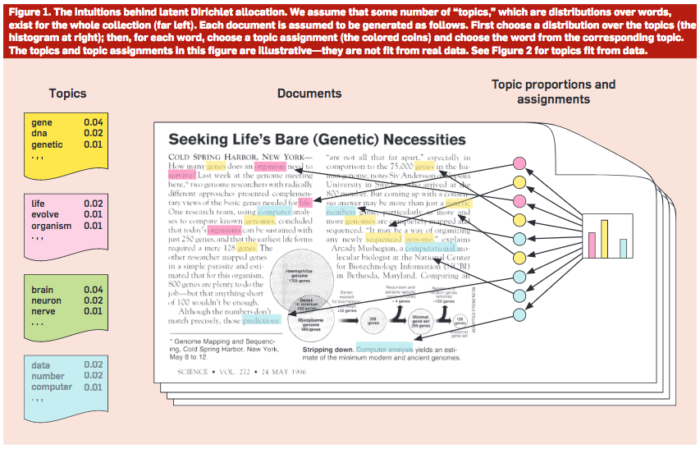

Let's first create a toy dataset 

In [42]:
# A set of sentences about Covid vaccine
doc1 = "The threat of vaccine nationalism"
doc2 = "Vaccine nationalism means that poor countries will be left behind"
doc3 = "Is vaccine nationalism an obstacle or an obligation?"
doc4 = "World Health Organization said vaccine nationalism could prolong the pandemic"
doc5 = "Which vaccine is being used in UK?"
doc6 = "Who should not get Covid vaccine?"
doc7 = "How many injections do you need for the Oxford vaccine?"
doc8 = "Does vaccine stop you getting Covid?"
doc9 = "Who is eligible to get the COVID-19 vaccine"

In [43]:
docs = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9]
docs

['The threat of vaccine nationalism',
 'Vaccine nationalism means that poor countries will be left behind',
 'Is vaccine nationalism an obstacle or an obligation?',
 'World Health Organization said vaccine nationalism could prolong the pandemic',
 'Which vaccine is being used in UK?',
 'Who should not get Covid vaccine?',
 'How many injections do you need for the Oxford vaccine?',
 'Does vaccine stop you getting Covid?',
 'Who is eligible to get the COVID-19 vaccine']

In [44]:
# Install and import libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
# Define a function for cleaning the documents via NLTK—remove stop words, punctuation, and normalise tokens 
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [46]:
# Clean the documents
clean_docs = [clean(doc).split() for doc in docs]

In [47]:
# Importing gensim and the LDA models
import gensim
from gensim import corpora, models
# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(clean_docs)
# Use the dictionary created above to convert the documents into document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_docs]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (2, 1), (8, 1), (9, 1)],
 [(0, 1),
  (2, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1), (17, 1), (18, 1)],
 [(2, 1), (19, 1), (20, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(2, 1), (19, 1), (25, 1), (26, 1)],
 [(2, 1), (20, 1), (27, 1), (28, 1)]]

### Running the LDA model

Parameters of the `models.ldamodel.LdaModel` function in `Gensim`
* `corpus` Document-terms matrix.

* `num_topics` The number of requested latent topics to be extracted from the training corpus.

* `id2word` Mapping from word IDs to words (via `gensim.corpora.dictionary.Dictionary`. It is used to determine the vocabulary size and topic printing.

In [48]:
# LDA model using gensim library
LDAModel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

# Resulting topics
print(LDAModel.print_topics(num_topics=5, num_words=5))

[(0, '0.172*"vaccine" + 0.094*"covid" + 0.094*"get" + 0.094*"nationalism" + 0.094*"obligation"'), (1, '0.034*"vaccine" + 0.034*"nationalism" + 0.034*"get" + 0.034*"covid" + 0.034*"threat"'), (2, '0.163*"vaccine" + 0.085*"nationalism" + 0.047*"organization" + 0.047*"world" + 0.047*"could"'), (3, '0.034*"vaccine" + 0.034*"nationalism" + 0.034*"get" + 0.034*"covid" + 0.034*"threat"'), (4, '0.154*"vaccine" + 0.058*"left" + 0.058*"behind" + 0.058*"poor" + 0.058*"country"')]


### Visualising the discovered topics via [pyLDAvis](http://bl.ocks.org/AlessandraSozzi/raw/ce1ace56e4aed6f2d614ae2243aab5a5/)
LDAvis is a web-based interactive visualisation of topics estimated using the LDA model

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=LDAModel, 
                              corpus=doc_term_matrix, 
                              dictionary=dictionary)
pyLDAvis.show(vis)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [11/Feb/2021 11:21:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 11:21:52] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 11:21:52] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 11:21:52] "GET /LDAvis.js HTTP/1.1" 200 -


## Acknowledgements

1. [Converting Text to Features,](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#) in _Natural Language Processing Recipes_. Akshay Kulkarni & Adarsha Shivananda. 2019.
2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html).
3. [Vector Semantics and Embeddings,](https://web.stanford.edu/~jurafsky/slp3/6.pdf) in _Speech and Language Processing_. Daniel Jurafsky & James H. Martin. Draft of December 30, 2020.
4. [K-Means Clustering with scikit-learn.](http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/)
5. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Daniel Chen. 2018. 

In [ ]:
wv.most_similar(positive=['psychology', 'sociology'], negative=['people'])

In [ ]:
# Doc2vec
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(corpus_brexit['text'])

In [ ]:
corpus_brexit['tokens']

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(corpus_brexit['tokens'])]

In [ ]:
doc1 = "PM sends letter to Brussels seeking further delay"
doc2 = "Nearly half of UK think Boris Johnson is lying about protecting NHS from Trump trade deal"
doc3 = "Biggest UK problem is its PARLIAMENT that thinks its ABOVE the people' Finnish MEP blasts"
doc4 = "Vote march: from every corner of the land they came, to join a very British rebellion in the rain"
doc5 = "General election: Boris Johnson to ask MPs to back 12 December poll"

In [1]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess

class ReadTxtFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname), encoding='latin'):
                yield simple_preprocess(line, min_len = 4)

In [2]:
mycorpus= ReadTxtFiles('/Users/valentindanchev/Documents/Teaching/sc207/SC207/DocByFile')

In [9]:
dictionary = corpora.Dictionary(ReadTxtFiles('/Users/valentindanchev/Documents/Teaching/sc207/SC207/DocByFile'))

dictionary

In [10]:
common_corpus = [dictionary.doc2bow(text) for text in mycorpus]

In [7]:
print(common_corpus[:1])

[[(0, 1), (1, 1)]]


In [8]:
from gensim import corpora, models
LDAModel = models.ldamodel.LdaModel(common_corpus, num_topics=3, id2word = dictionary, passes=20)
print(LDAModel.print_topics(num_topics=3, num_words=3))

[(0, '0.033*"that" + 0.032*"have" + 0.018*"been"'), (1, '0.023*"with" + 0.013*"which" + 0.013*"from"'), (2, '0.024*"that" + 0.015*"with" + 0.010*"when"')]


In [15]:
# Plotting tools
#! pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# ! pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user


import funcy as fp
import numpy as np
from scipy.sparse import issparse

import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


import pyLDAvis.gensim


from IPython.core.display import HTML

vis = pyLDAvis.gensim.prepare(LDAModel, common_corpus, dictionary)
vis

pyLDAvis.show

pyLDAvis.display(vis)


%matplotlib inline

pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

from IPython.core.display import display, HTML

/Users/valentindanchev/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
pyLDAvis.display(vis)

/Users/valentindanchev/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
! pip install graphlab
import graphlab as gl
pyLDAvis.graphlab.prepare(LDAModel, common_corpus)

/Users/valentindanchev/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement graphlab
ERROR: No matching distribution found for graphlab


ModuleNotFoundError: No module named 'graphlab'

In [104]:
# Convert a collection of text documents to a matrix of token counts

vectorizer_corpus = CountVectorizer()

#  Learn the vocabulary from the corpus and tokenise
vectorizer_corpus.fit(corpus['text'])

# Transform documents to document-term matrix
vector_corpus = vectorizer_corpus.transform(corpus['text'])

# Print the tokens as a dictionary with tokens (keys) and integer feature indices (values) using the vocabulary_ attribute
print(dict(sorted(vectorizer_corpus.vocabulary_.items(), key=lambda item: item[1])))

index
0      [video, image, satellite, image, insane, view, nsw, fire, space, satellite, image, huge, smoke, billow, number, bushfire, nsw, nsw, fire, space, source, twitter, startling, satellite, image, fire,...
1      [chief_executive, address, press, citywide, chaos, transport, disruption, early, police, shoot, protester, leave, -pron-, intensive, care, separately, man, set, fire, dispute, chaos, continue, sho...
2      [hong_kong, cnn, china, announce, curfew, online, gaming, minor, new, measure, aim, curb, video, game, addiction, official, government, guideline, apply, online, gaming, platform, operate, country...
3      [washington, cnn, president_donald, trump, relentlessly, dishonest, week, scandal, -pron-, dealing, ukraine, false_claim, component, story, trump, false_claim, week, second, high, total, week, -pr...
4      [cnn, bread, -pron-, likely, think, long, -pron-, hungry, slice, sourdough, crave, tortilla, -pron-, imagine, lot, -pron-, bread, easy, picture, -pron-, hard, 

In [117]:
vectorizer_corpus

CountVectorizer()

In [ ]:
import pandas as pd
from glob import glob as glob

data = pd.DataFrame()
names = ['state']

for f in gg('*.txt'):
    tmp = pd.read_csv(f, names = names)

#    data = pd.concat([data,tmp],axis=0,ignore_index=True)

In [ ]:
data.shape

In [ ]:
! ls *.txt

In [ ]:
filenames = ['Untitled78copy.txt', 'Untitled78.txt']
dataframes = [pd.read_csv(f) for f in filenames]

In [ ]:
dataframes

In [ ]:
import nltk as nltk
filenames = [
    "shakespeare-caesar.txt",
    "shakespeare-hamlet.txt",
    "shakespeare-macbeth.txt"
]
with open("*.txt", "w") as f:
    for filename in filenames:
        f.write(filename)

In [ ]:
all_files = glob.glob(os.path.join(path, "*.txt"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
with open('*.txt', 'r') as read_files:
    file_lines = read_files.readlines()
    # print the length of the lines from the input file
    print(len(file_lines), "files added")



In [ ]:

    # do stuff per line (which in your case is a file name)
    for file_name in file_lines:
        print(file_name.strip())

In [ ]:
with open('*.txt', 'r') as readfiles:
    for infile in read_files:
        with open(infile) as infile2:
             # Do something with contents
            print(infile)

In [ ]:
import glob
filenames = sorted(glob.glob('*.txt'))
for filename in filenames:
    print(filename)

In [ ]:
with open('*.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
#content = [x.strip() for x in content] 

In [ ]:
content

In [ ]:
content

In [ ]:
with open('*.txt', 'r') as f:
    lines = [line.rstrip() for line in f]

In [ ]:
lines

In [ ]:
filepaths = glob.glob("*.txt")
headers = []
for fp in filepaths:
        with open(fp, 'r') as f:
            # Read the first line
            first_line = f.readline()
            # Append the first line into the list
            headers.append(first_line)
print(headers)

In [ ]:
headers

In [ ]:
txt = DirOfPlainTextCorpus('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data')

In [ ]:
! pip install text-sentence

In [ ]:
import re
import os
class DirOfPlainTextCorpus(object):
    """Iterate over sentences of all plaintext files in a directory """
    SPLIT_SENTENCES = re.compile(u"[.!?:]\s+")  # split sentences on these characters

    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fn in os.listdir(self.dirname):
            text = open(os.path.join(self.dirname, fn)).read()
            for sentence in self.SPLIT_SENTENCES.split(text):
                yield gensim.utils.simple_preprocess(sentence, deacc=True)

model = gensim.models.Word2Vec(DirOfPlainTextCorpus('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data'), size=200, min_count=3, workers=2)

In [ ]:
len(model.wv.vocab)

In [ ]:
model.wv.vocab

In [ ]:
from gensim.corpora.textcorpus import TextCorpus
from gensim.test.utils import datapath
from gensim import utils

In [ ]:
class CorpusMiislita(TextCorpus):
    stopwords = set('for a of the and to in on'.split())

    def get_texts(self):
        for doc in self.getstream():
            yield [word for word in utils.to_unicode(doc).lower().split() if word not in self.stopwords]

    def __len__(self):
        self.length = sum(1 for _ in self.get_texts())
        return self.length

In [ ]:
corpus = CorpusMiislita(datapath('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data'))

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess

class ReadTxtFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname), encoding='latin'):
                yield simple_preprocess(line)

In [ ]:


dictionary = corpora.Dictionary(ReadTxtFiles('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data'))



In [ ]:
dictionary

In [ ]:
dictionary.token2id

In [ ]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname), errors='ignore'):
                yield gensim.utils.simple_preprocess(line, deacc=True)
 
sentences = MySentences('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data') # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

In [ ]:
    def __iter__(self):
        for fn in os.listdir(self.dirname):
            text = open(os.path.join(self.dirname, fn)).read()
            for sentence in self.SPLIT_SENTENCES.split(text):
                yield gensim.utils.simple_preprocess(sentence, deacc=True)


                
model['frankenstein']

In [ ]:
sentences

In [ ]:
model

In [ ]:
model.wv.vocab

In [ ]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            # specify encoding "cp437" as other encodings, e.g., "utf8" may give you an error
            for line in open(os.path.join(self.dirname, fname), encoding='cp437'): 
                print(line)
                yield line.split()
                
sentences = MySentences(DocByLine) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

The function `MySentences` gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)


gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)


Convert a document into a list of tokens.

This lowercases, tokenizes, de-accents (optional). – the output are final tokens = unicode strings, that won’t be processed any further.



Let's say that we have a few books from in a directory. The MySentences   

In [ ]:

from gensim.summarization.textcleaner import split_sentences


class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            print(self.dirname)
            print(fname)
            with open(os.path.join(self.dirname, fname), errors='ignore') as f:
                # Read each file and replace multiple characters at once using nested replace()
                text = f.read().replace('\n', '').replace('”', '').replace('“', '')
                # Use the re module to replace all multiple whitespaces with single whitespace 
                text = re.sub('\s+',' ',text)
                # print(text) # uncomment to see the output
                # Split the text into a list of sentences using the split_sentences function from gensim   
                for sentence in split_sentences(text):
                    # print("SENTENCE:",sentence) # uncomment to see the output
                    yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [ ]:
sentences = MySentences(text_directory) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)

In [ ]:
class SentencesIterator():
    def __init__(self, generator_function):
        self.generator_function = generator_function
        self.generator = self.generator_function()

    def __iter__(self):
        # reset the generator
        self.generator = self.generator_function()
        return self

    def __next__(self):
        result = next(self.generator)
        if result is None:
            raise StopIteration
        else:
            return result

In [ ]:
from gensim.models import FastText

sentences = SentencesIterator(tokens_generator)
model = FastText(sentences) 

In [ ]:
import string

s = '  Hello  World   From Pankaj \t\n\r\tHi There  '
s.translate({ord(c): None for c in string.whitespace})



In [ ]:
model['frankenstein']

In [ ]:
model.wv.vocab

In [ ]:
sentences = [['first', 'sentence'], ['second', 'sentence']]

In [ ]:
model = gensim.models.Word2Vec(sentences, min_count=1)
model.wv.vocab

In [ ]:
import re
import os
from gensim.summarization.textcleaner import split_sentences
class DirOfPlainTextCorpus(object):
    """Iterate over sentences of all plaintext files in a directory """
    SPLIT_SENTENCES = re.compile(u"[.!?:]\s+")  # split sentences on these characters

    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fn in os.listdir(self.dirname):
            text = open(os.path.join(self.dirname, fn),errors='ignore').read()
            for sentence in self.SPLIT_SENTENCES.split(text):
                print("sentence1", sentence)
                yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [ ]:
model = gensim.models.Word2Vec(DirOfPlainTextCorpus('/Users/valentindanchev/Documents/Teaching/sc207/SC207/data'), size=200, min_count=3, workers=2)

In [ ]:
! pip install gutenberg